In [ ]:
install.packages("WallomicsData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("BiocParallel")

BiocManager::install('mixOmics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite',
  'vroom', 'waldo', 'whisker', 'xfun', 'xml2', 'zip', 'boot', 'class',
  'foreign', 'KernSmooth', 'MASS', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories",

In [ ]:
# Charger les packages

library(mixOmics)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.24.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [ ]:
library(WallomicsData)

In [ ]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [ ]:
library("matrixStats")

In [ ]:
data("Altitude_Cluster")
data("Ecotype")
data("Genetic_Cluster")
data("Metabolomics_Rosettes")
data("Metabolomics_Stems")
data("Metadata")
data("Phenomics_Rosettes")
data("Phenomics_Stems")
data("Proteomics_Rosettes_CW")
data("Proteomics_Stems_CW")
data("Transcriptomics_Rosettes")
data("Transcriptomics_Rosettes_CW")
data("Transcriptomics_Stems")
data("Transcriptomics_Stems_CW")


#univariate analysis ROSETTE ECOTYPE

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Rosettes)){Metabolomics_Rosettes[,i][is.na(Metabolomics_Rosettes[,i])]<-median(Metabolomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Rosettes)){Phenomics_Rosettes[,i][is.na(Phenomics_Rosettes[,i])]<-median(Phenomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Rosettes_CW)){Proteomics_Rosettes_CW[,i][is.na(Proteomics_Rosettes_CW[,i])]<-median(Proteomics_Rosettes_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes)){Transcriptomics_Rosettes[,i][is.na(Transcriptomics_Rosettes[,i])]<-median(Transcriptomics_Rosettes[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Rosettes_CW)){Transcriptomics_Rosettes_CW[,i][is.na(Transcriptomics_Rosettes_CW[,i])]<-median(Transcriptomics_Rosettes_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Rosettes)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Rosettes <- Transcriptomics_Rosettes[,-which(colnames(Transcriptomics_Rosettes)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

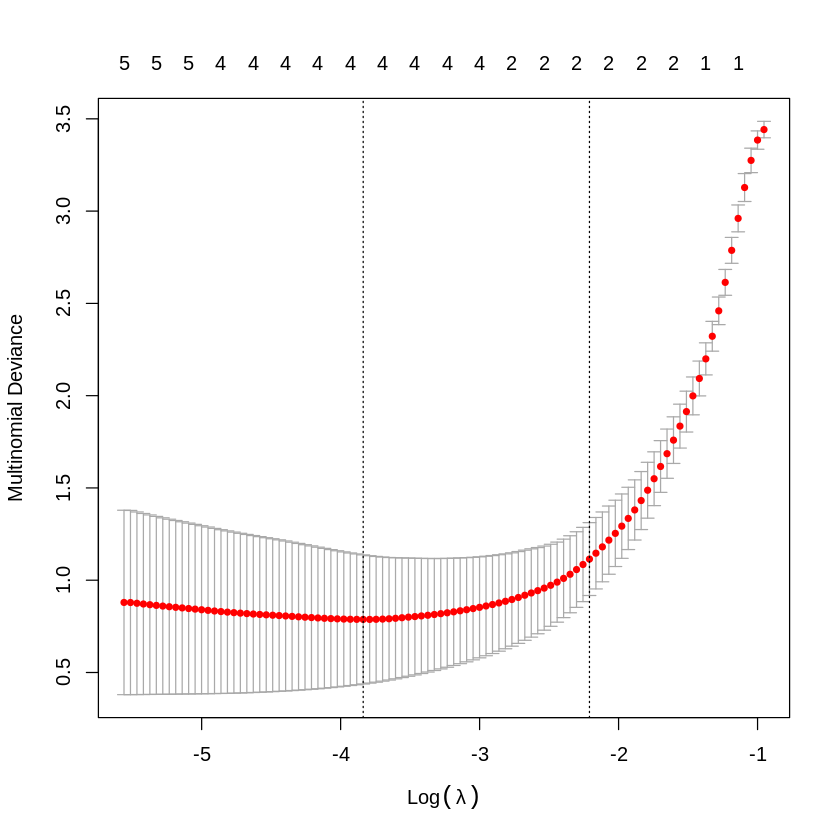

In [ ]:
#Proteomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Rosettes_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Rosettes_CW)[unlist(coef)]
Proteomics_Rosettes_CW<-subset(Proteomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

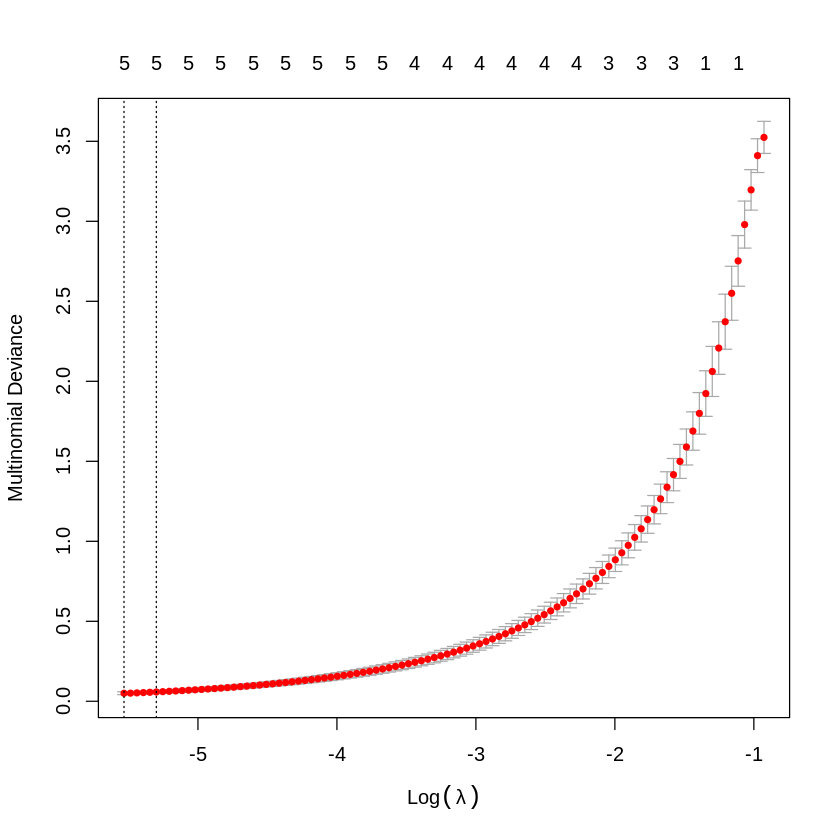

In [ ]:
#Transcriptomics_Rosettes
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes)[unlist(coef)]
Transcriptomics_Rosettes<-subset(Transcriptomics_Rosettes, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

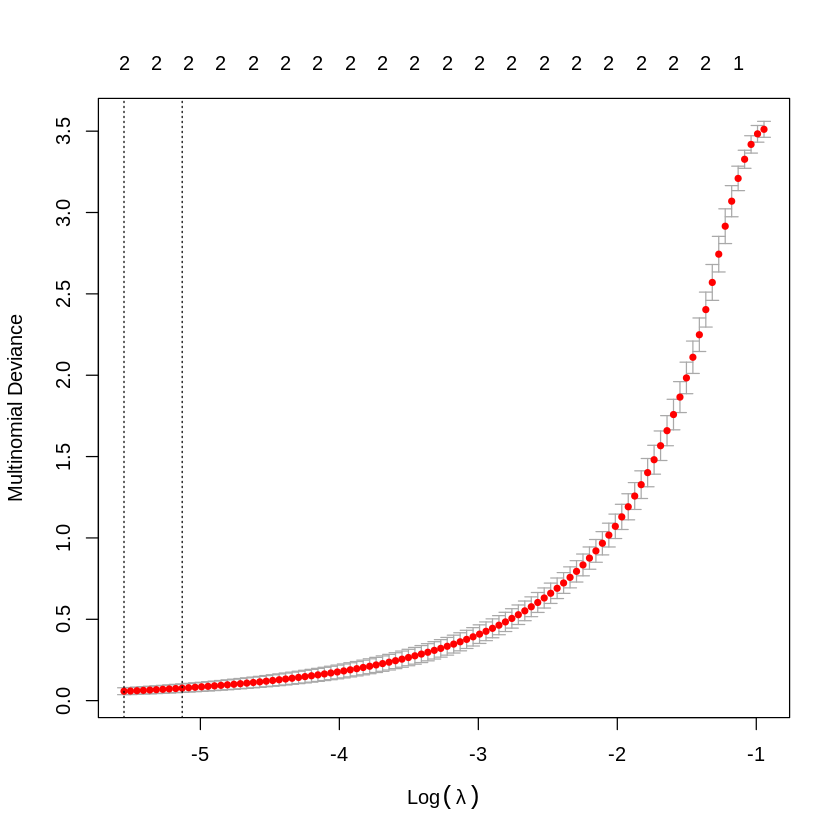

In [ ]:
#Transcriptomics_Rosettes_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Rosettes_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Rosettes_CW)[unlist(coef)]
Transcriptomics_Rosettes_CW<-subset(Transcriptomics_Rosettes_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Rosettes_CW)
dim(Transcriptomics_Rosettes)
dim(Proteomics_Rosettes_CW)

[1] 30 19

[1] 30 26

[1] 30 21

###PCA analysis:

**Metabolomics_Rosettes:**

,Pectin_RGI,Pectin_HG,XG,Pectin_linearity,Contribution_RG,RGI_branching
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Col.22.1,75.95791,60.28917,92.87987,0.9402467,0.2876133,2.697849
Col.22.2,63.70577,76.67599,89.75543,1.3244072,0.1683510,3.485004
Col.22.3,69.04940,78.73487,103.19934,1.2785566,0.1996149,2.918205
Col.15.1,57.55757,43.65080,81.75463,0.8494954,0.1979410,4.947072
Col.15.2,79.39145,74.33798,116.75840,1.0278840,0.1643535,4.919391
Col.15.3,84.35585,73.30991,123.26794,0.9566913,0.1690592,5.182858


      PC1       PC2       PC3       PC4 
0.4375291 0.8180822 0.9684057 0.9981591 


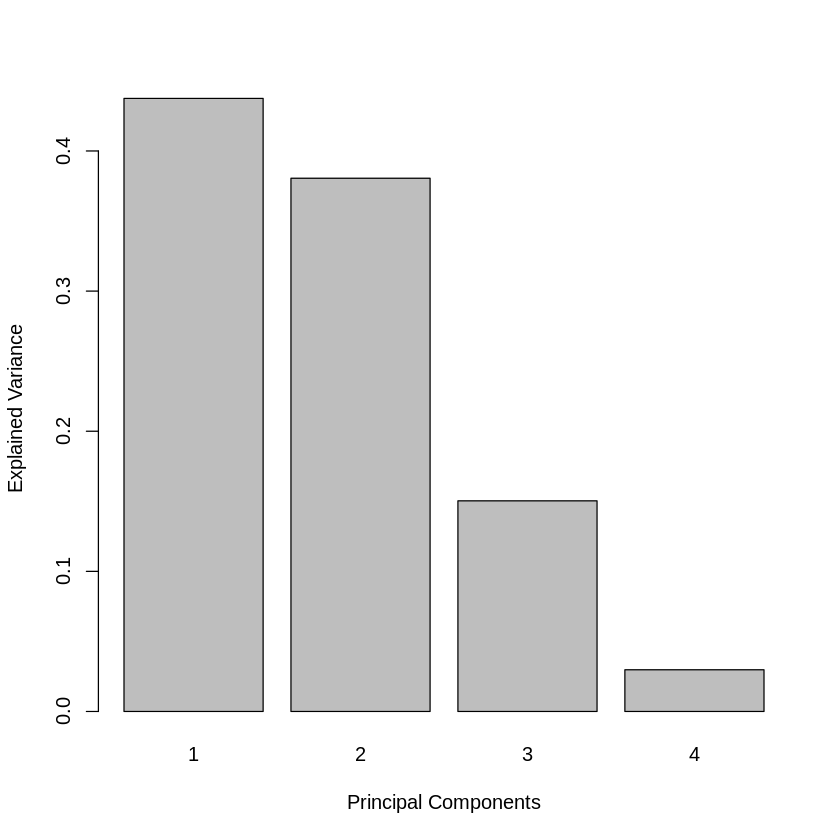

In [ ]:
#Metabolomics_Rosettes
data("Metabolomics_Rosettes")
x<-Metabolomics_Rosettes
#rownames(x)<-NULL
head(x)
pca_meta_ros<- tune.pca(x, ncomp = 4,center = TRUE, scale = TRUE)
plot(pca_meta_ros)
print(pca_meta_ros$cum.var)       # Outputs cumulative proportion of variance we see ythat the first 2 comp explains 0.81 of the variance then we only n=use them

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_meta_ros <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_meta_ros$var.tot)
print(final_pca_meta_ros$prop_expl_var$X)

In [ ]:
#Identify the informative variables
# Top variables on the first component only:
#Here the variables are not selected (all are included), but ranked according to their importance in defining each component.

head(selectVar(final_pca_meta_ros, comp = 1)$value)

,value.var
,<dbl>
RGI_branching,-0.604496206
Pectin_linearity,0.479998269
Contribution_RG,0.469044756
XG,-0.348447872
Pectin_HG,0.250407358
Pectin_RGI,0.007953045


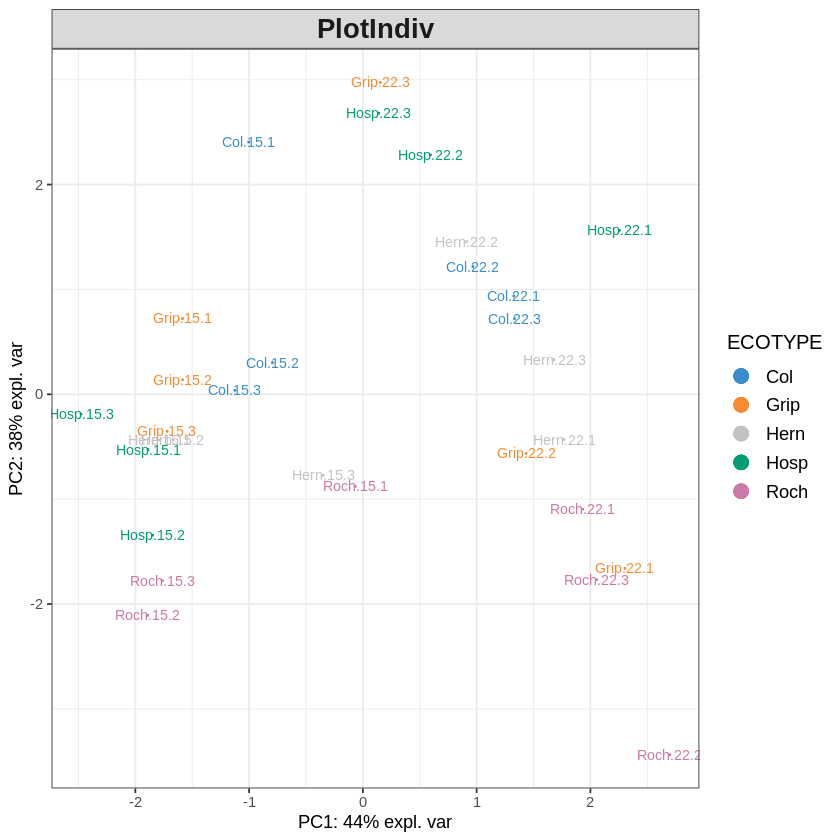

In [ ]:
data("Ecotype") # we're using this to groupe we can use also temperatures
# Interactive 3D plot will load the rgl library.
plotIndiv(final_pca_meta_ros,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group = Ecotype,
          #title = 'Metabolomics_Rosettes grouped by Ecotype',
          legend = TRUE, legend.title = 'ECOTYPE'
          )
#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent ecotype from this we understand that using eco type to grp was a good choice )

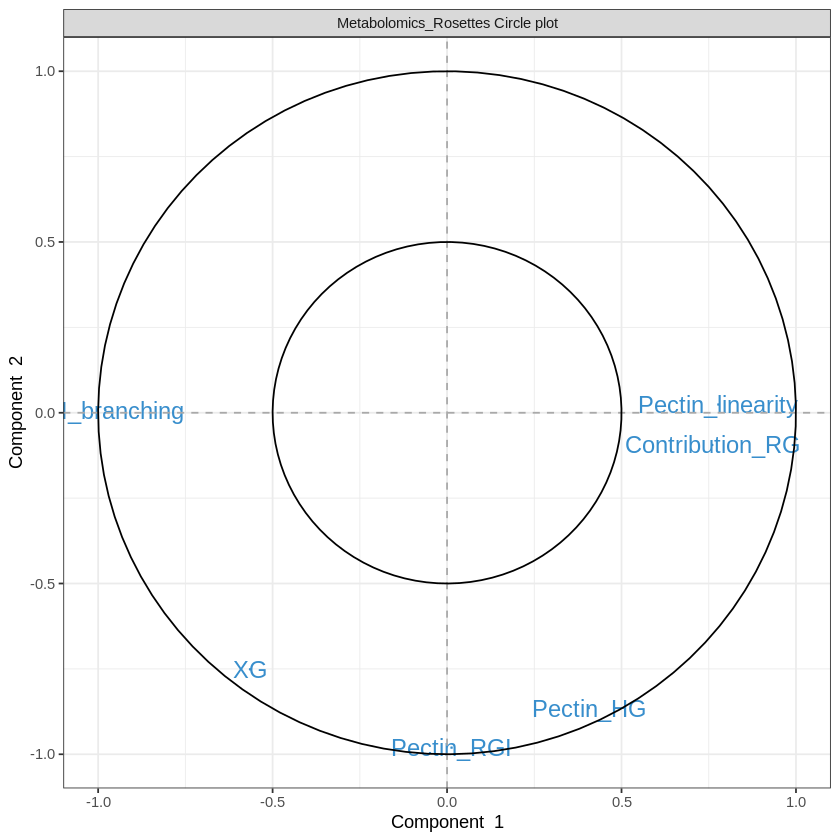

In [ ]:
# Variable plot: correlation circle plot

plotVar(final_pca_meta_ros, comp = c(1,2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomics_Rosettes Circle plot')


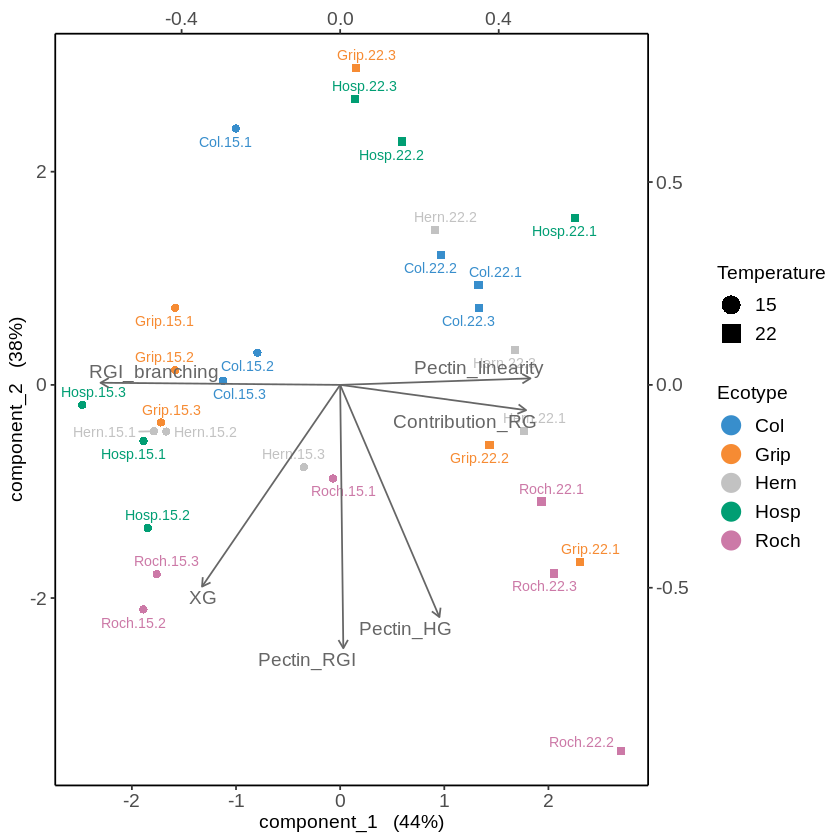

In [ ]:
#Biplot: samples and variables
biplot(final_pca_meta_ros, group = Ecotype, legend.title = 'Ecotype',pch = Temperature,legend.title.pch="Temperatue")

#the points you see in the plot are sample code (row names col.x.x grep.x.x and they represent ecotype from this we understand that using eco type to grp was a good choice )

**Phenomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5 
0.6057165 0.9392294 0.9761129 0.9993821 1.0000000 


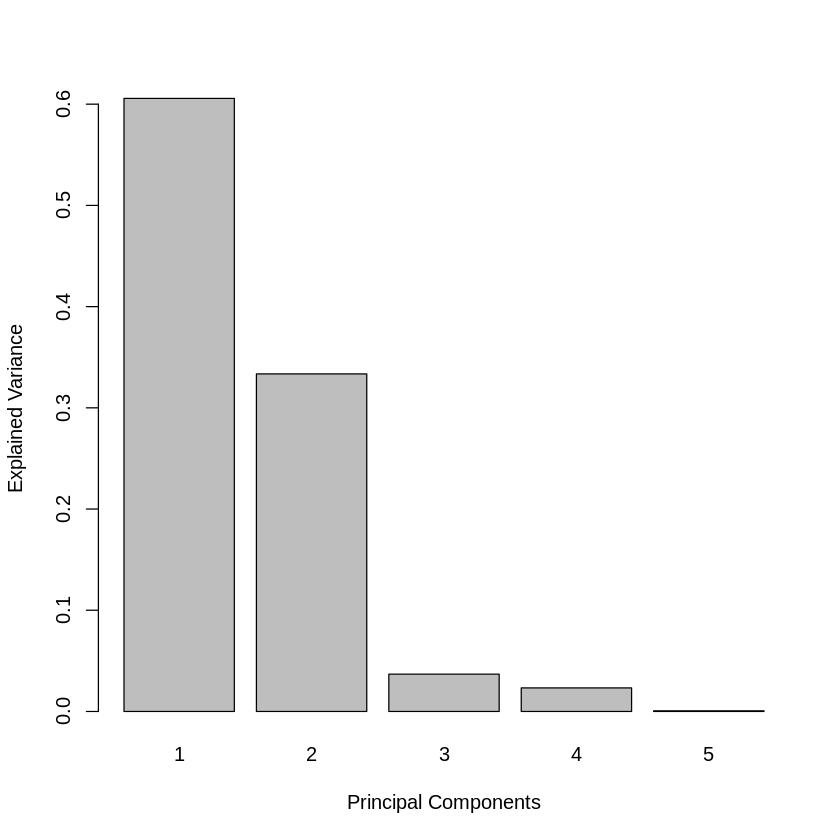

In [ ]:
x<-Phenomics_Rosettes
tune_pca_Phenomics_Rosettes <- tune.pca(x, ncomp = 5, scale = TRUE)
plot(tune_pca_Phenomics_Rosettes)
print(tune_pca_Phenomics_Rosettes$cum.var)  

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.93 of the total variance gence we only use those
final_pca_Phenomics_Rosettes <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Rosettes$var.tot)
print(final_pca_Phenomics_Rosettes$prop_expl_var$X)

[1] 5
      PC1       PC2 
0.6057165 0.3335130 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
Mass,0.5422527
Leaves_number,0.5420844
Density,0.5145020
Area,0.3669076
Diameter,-0.1130175


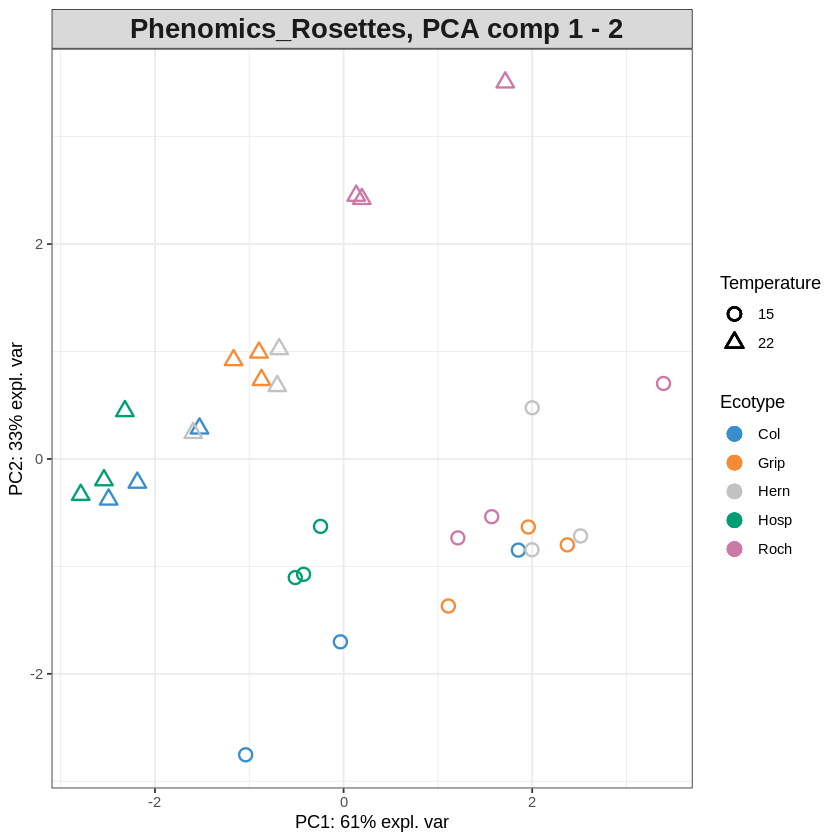

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Phenomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

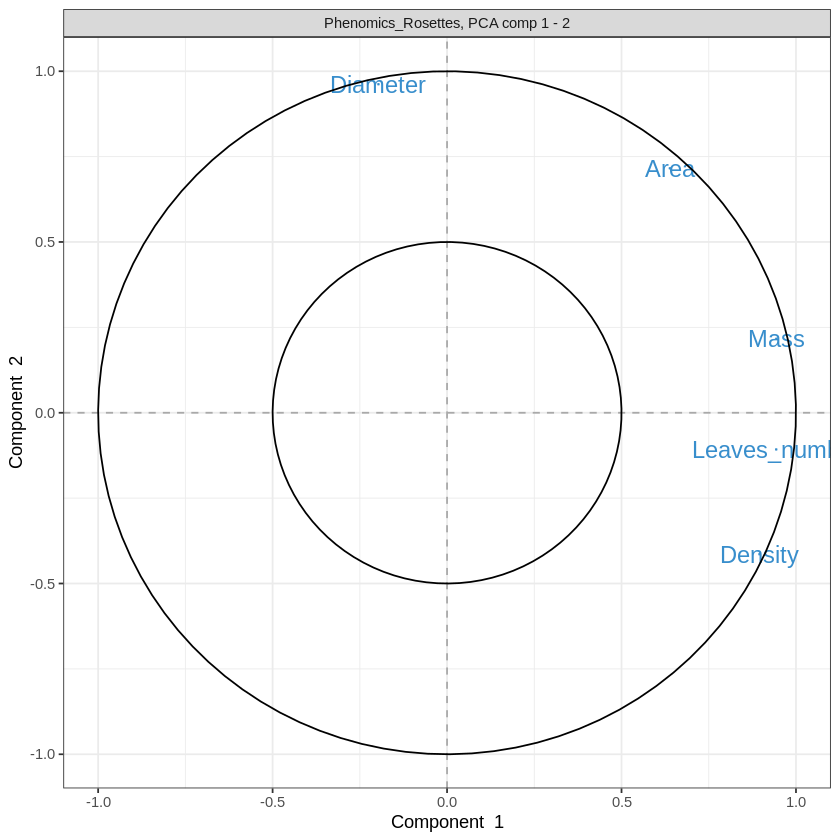

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Rosettes, PCA comp 1 - 2')

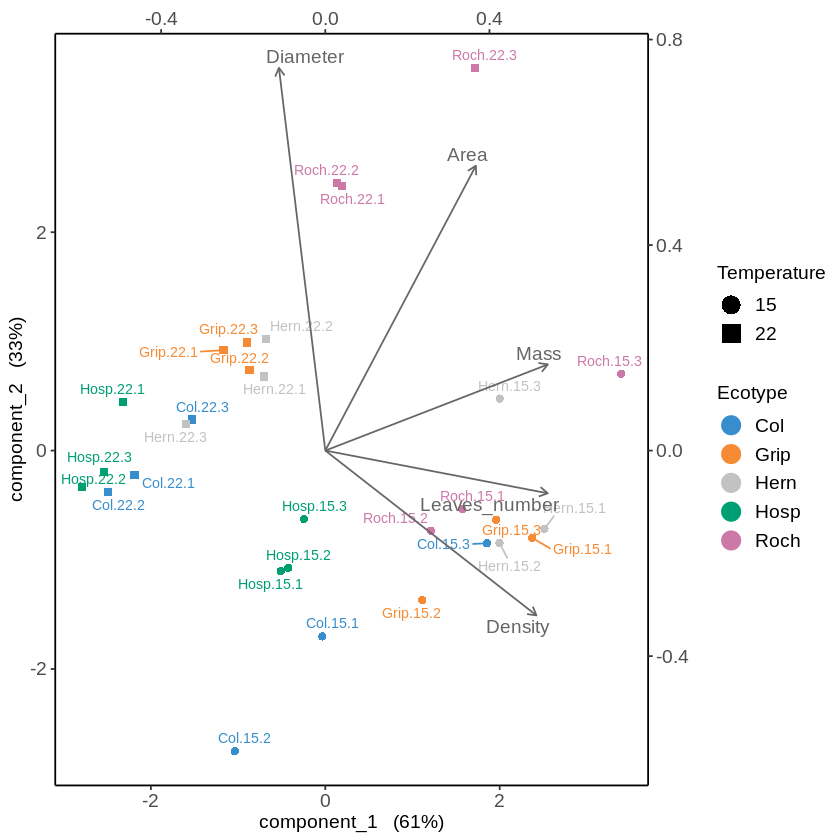

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Rosettes,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Proteomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2391347 0.4531996 0.5735549 0.6813493 0.7574132 0.8196427 0.8614093 0.8914952 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9171618 0.9386612 0.9582902 0.9716964 0.9805897 0.9884184 0.9921139 0.9948571 
     PC17      PC18      PC19      PC20 
0.9968963 0.9985944 0.9994881 1.0000000 


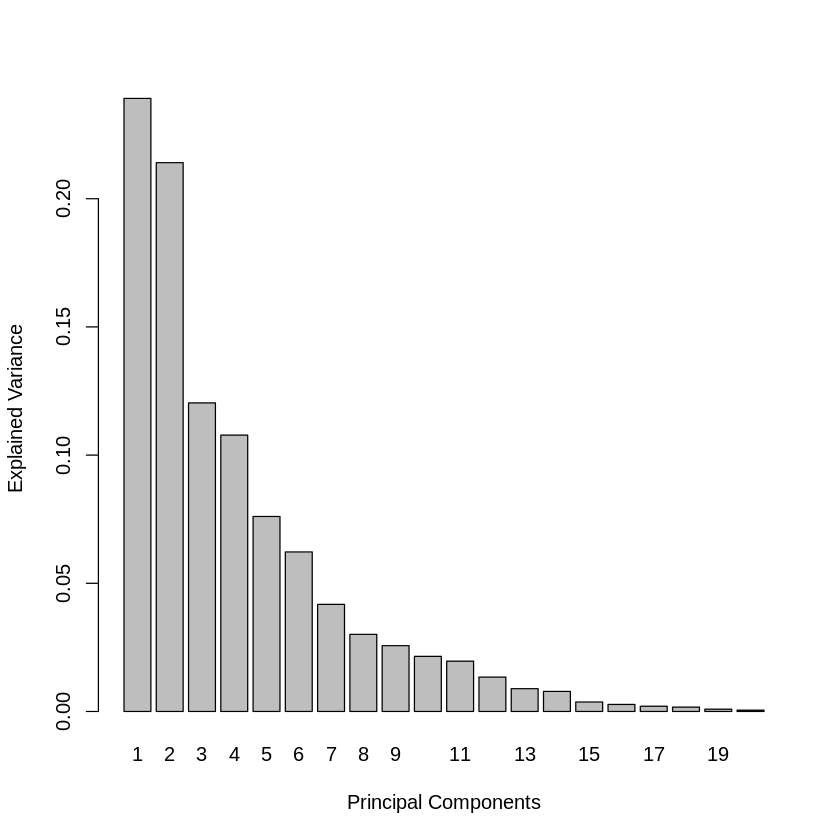

In [ ]:
x<-Proteomics_Rosettes_CW
tune_pca_Proteomics_Rosettes_CW<- tune.pca(x, ncomp = 20, scale = TRUE)
plot(tune_pca_Proteomics_Rosettes_CW)
print(tune_pca_Proteomics_Rosettes_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Rosettes_CW <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Rosettes_CW$var.tot)
print(final_pca_Proteomics_Rosettes_CW$prop_expl_var$X)

[1] 21
      PC1       PC2 
0.2391347 0.2140649 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT1G03230,-0.3736338
AT1G53830,0.3387647
AT1G78680,-0.3380343
AT1G58270,-0.3371689
AT5G38940,0.3261468
AT1G78450,0.3043100


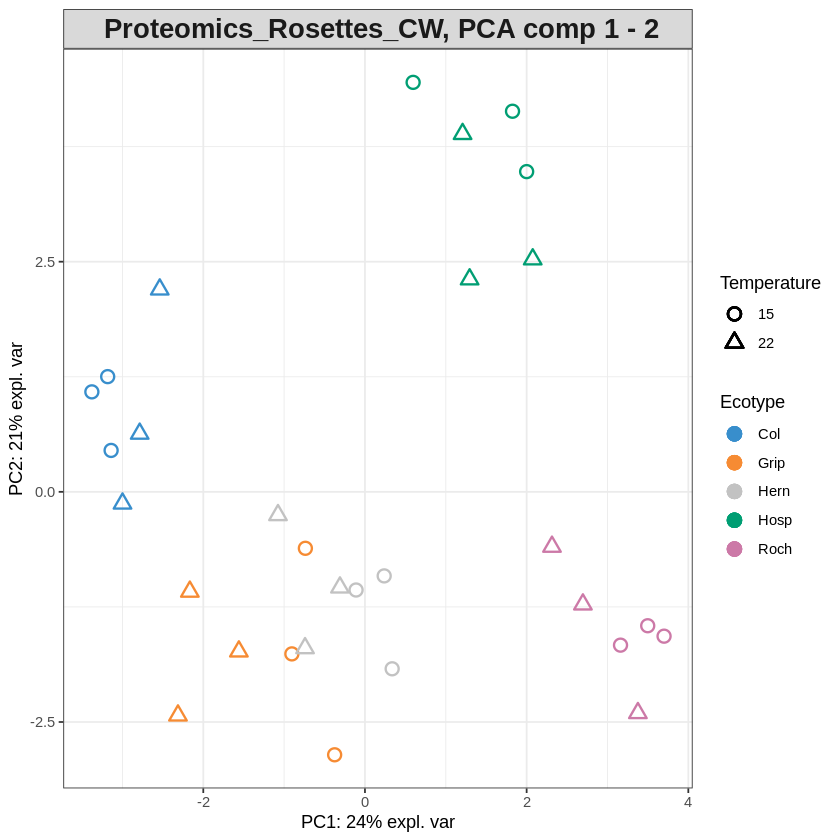

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Proteomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

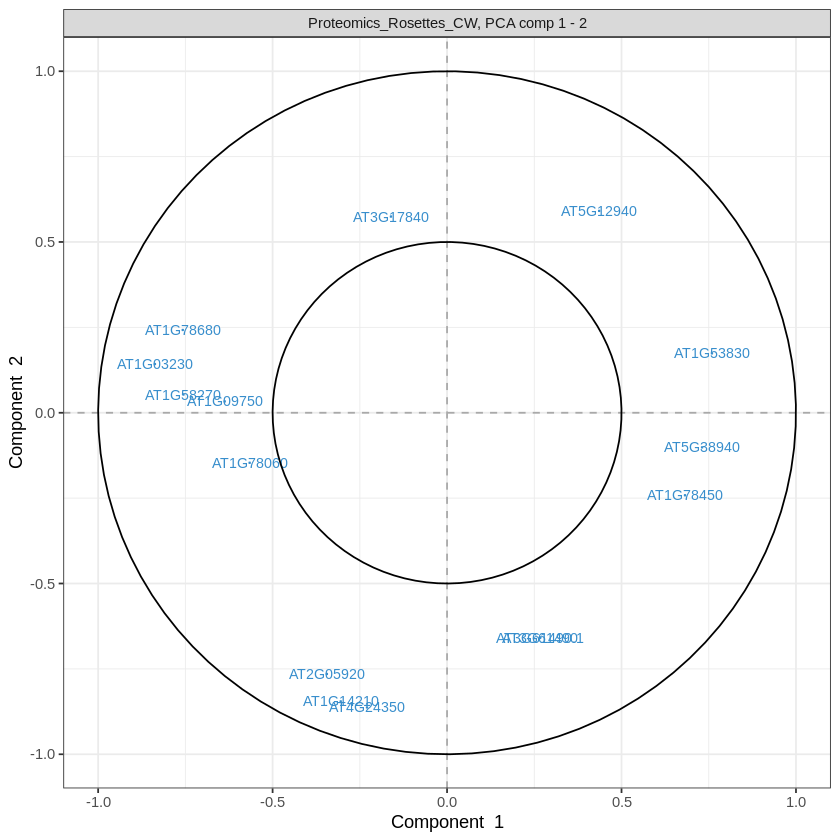

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Rosettes_CW, PCA comp 1 - 2')

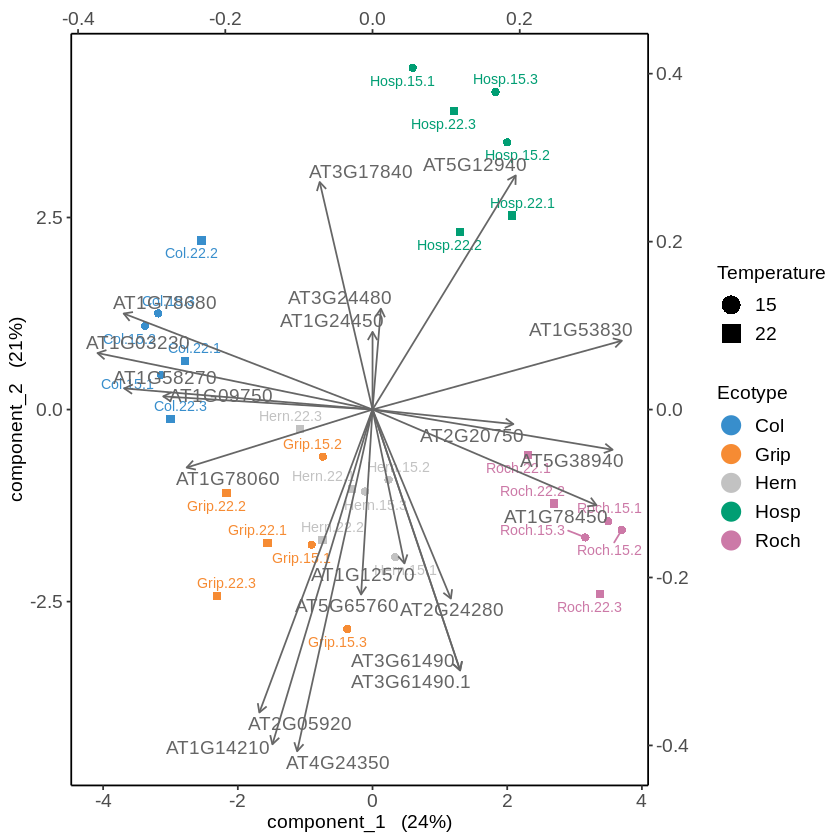

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Rosettes_CW,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Transcriptomics_Rosettes:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2629199 0.5028175 0.7211120 0.9189493 0.9343953 0.9462066 0.9552058 0.9627570 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9698095 0.9758935 0.9804530 0.9841946 0.9873745 0.9902287 0.9919867 0.9935776 
     PC17      PC18      PC19      PC20 
0.9950293 0.9962632 0.9973295 0.9981131 


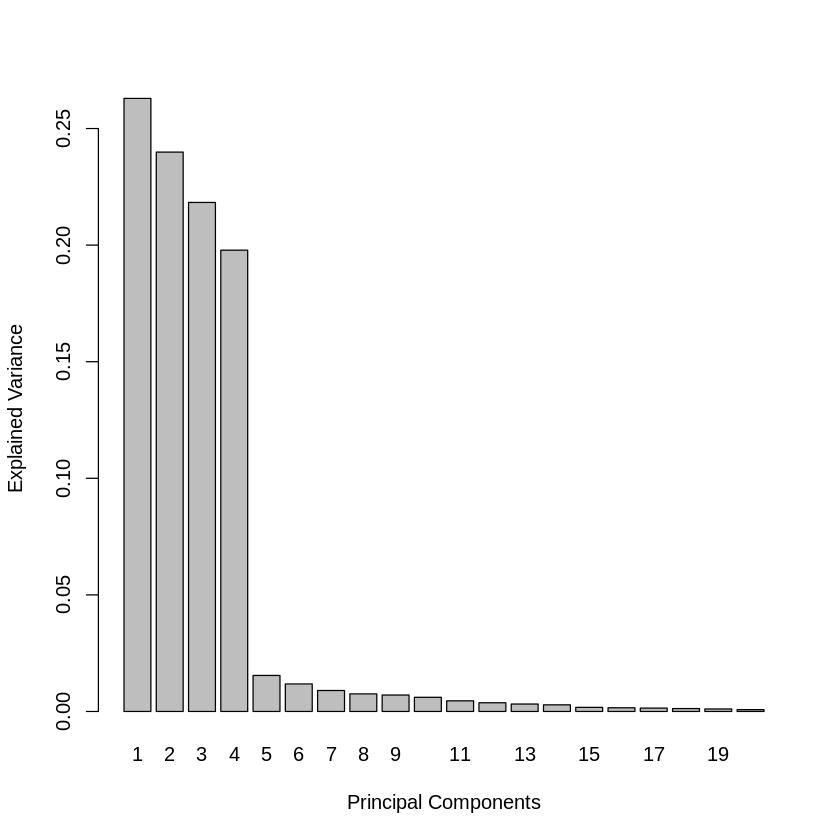

In [ ]:
x<-Transcriptomics_Rosettes
tune_pca_Transcriptomics_Rosettes<- tune.pca(x, ncomp = 20, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes)
print(tune_pca_Transcriptomics_Rosettes$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes$var.tot)
print(final_pca_Transcriptomics_Rosettes$prop_expl_var$X)

[1] 26
      PC1       PC2 
0.2629199 0.2398976 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes, comp = 1)$value)

,value.var
,<dbl>
AT4G16940,0.3361685
AT1G65290,-0.3345796
AT2G40955,0.3338624
AT1G44030,0.3278645
AT5G35796,0.3266851
AT4G29200,0.3223209


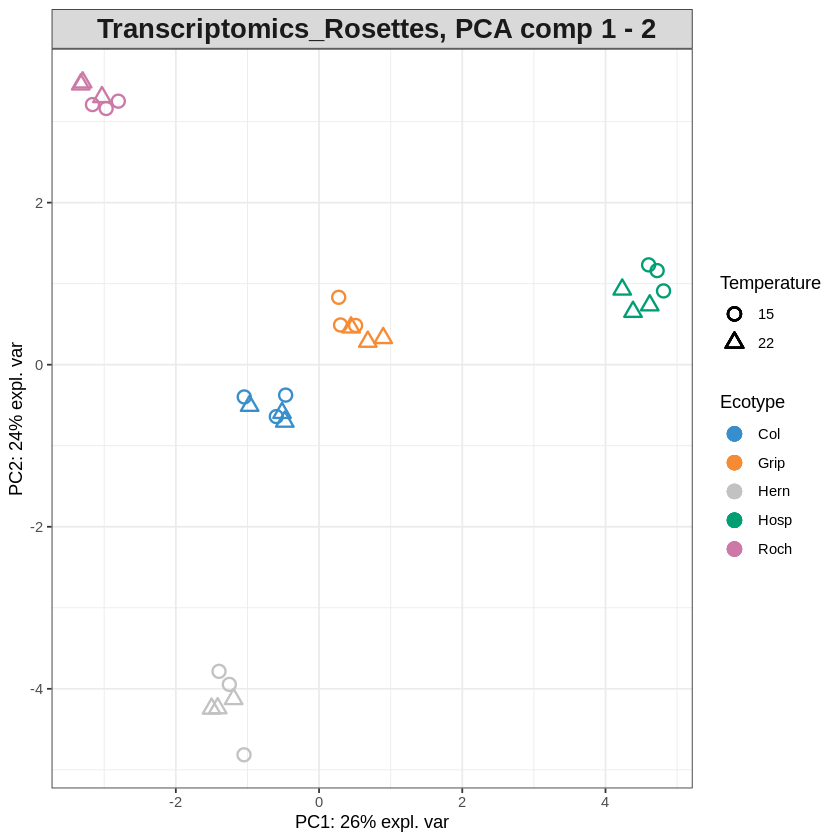

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

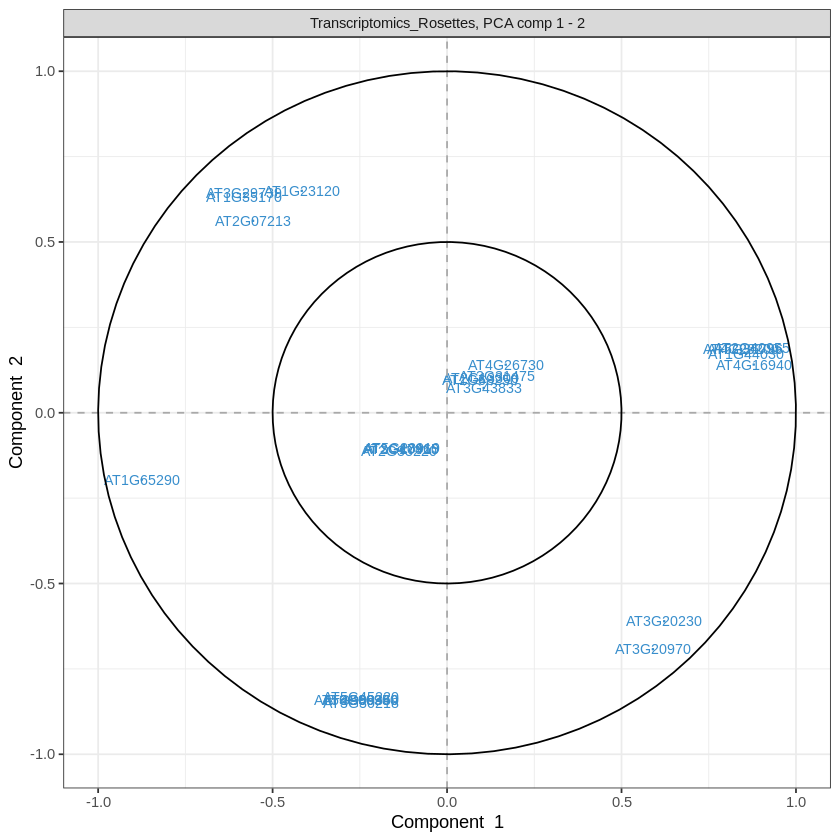

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

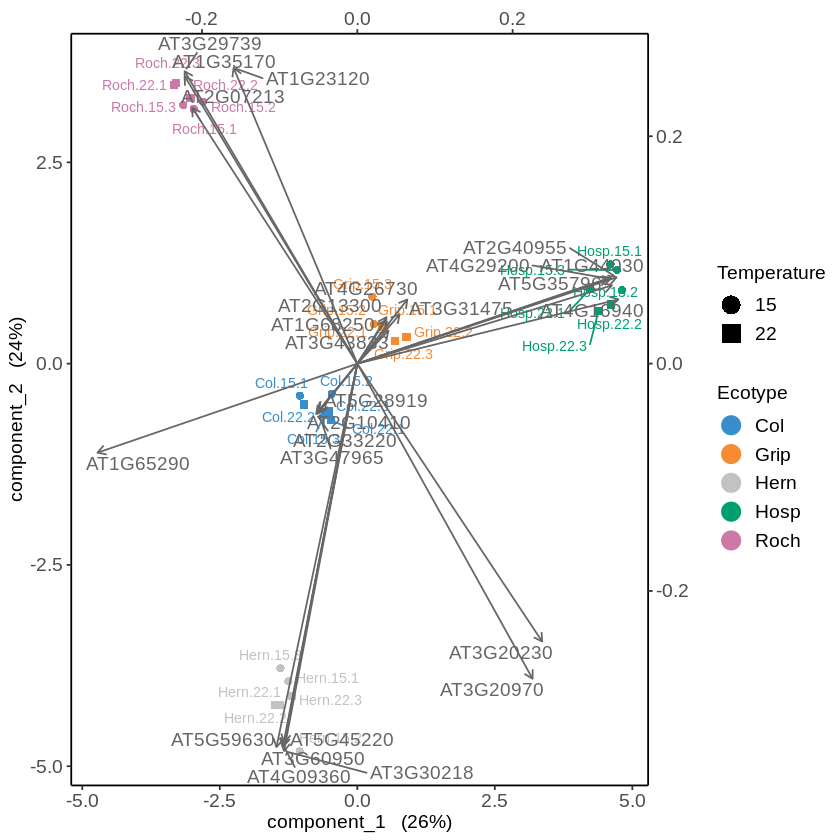

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Transcriptomics_Rosettes_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2942047 0.5061874 0.6879347 0.8190101 0.8692144 0.9053132 0.9326086 0.9489361 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9633470 0.9751777 0.9823452 0.9872615 0.9917716 0.9946822 0.9969307 0.9985738 
     PC17      PC18 
0.9994243 1.0000000 


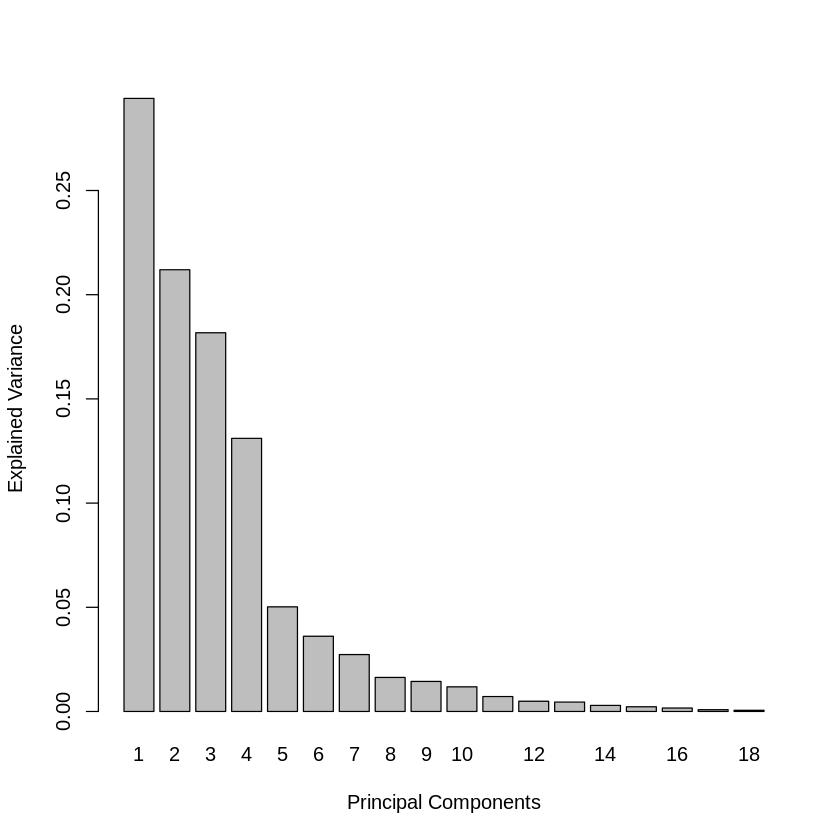

In [ ]:
x<-Transcriptomics_Rosettes_CW
tune_pca_Transcriptomics_Rosettes_CW<- tune.pca(x, ncomp = 18, scale = TRUE)
plot(tune_pca_Transcriptomics_Rosettes_CW)
print(tune_pca_Transcriptomics_Rosettes_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Rosettes_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Rosettes_CW$var.tot)
print(final_pca_Transcriptomics_Rosettes_CW$prop_expl_var$X)

[1] 19
      PC1       PC2 
0.2942047 0.2119827 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Rosettes_CW, comp = 1)$value)

,value.var
,<dbl>
AT1G49740,-0.3876418
AT5G38980,-0.3689409
AT4G29240,-0.3227711
AT4G29240.1,-0.3227711
AT2G47010,-0.3117074
AT1G78450,0.3105761


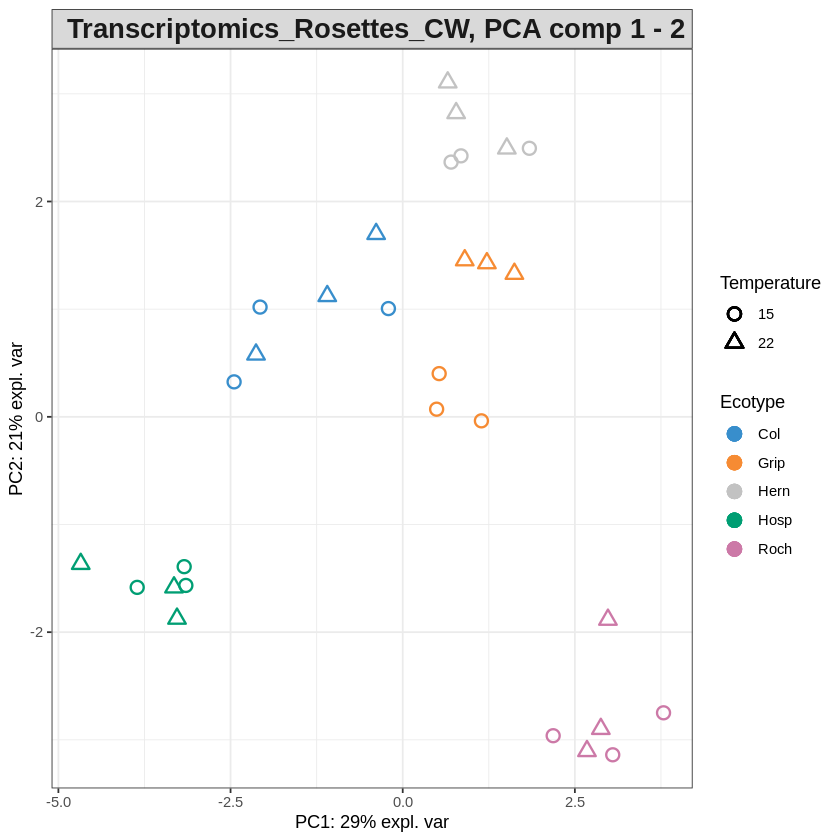

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Rosettes_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Transcriptomics_Rosettes_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

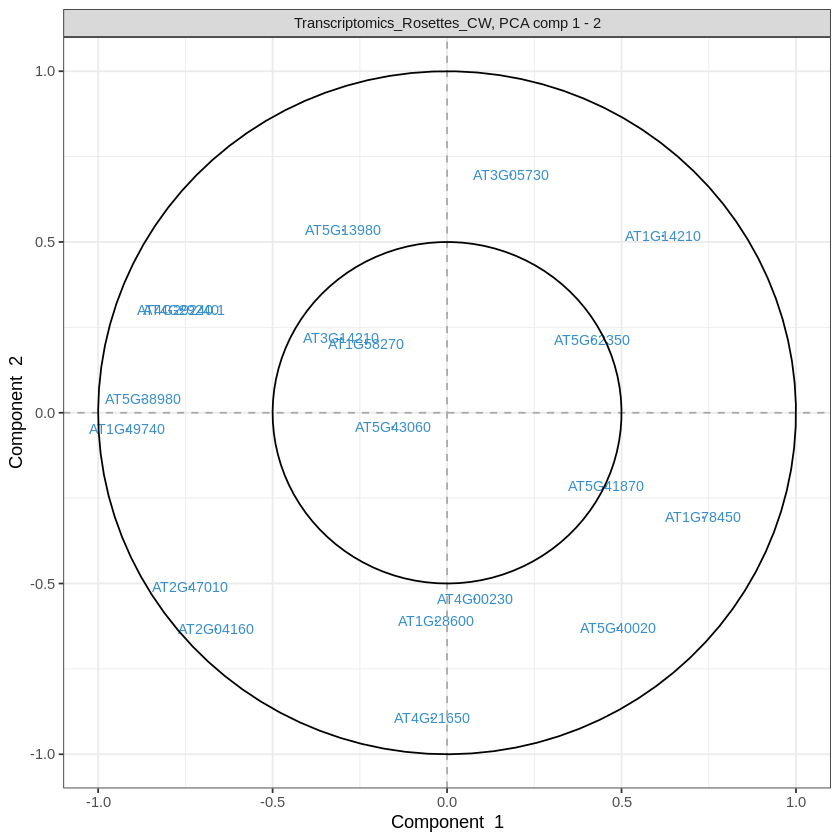

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Rosettes_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes_CW, PCA comp 1 - 2')

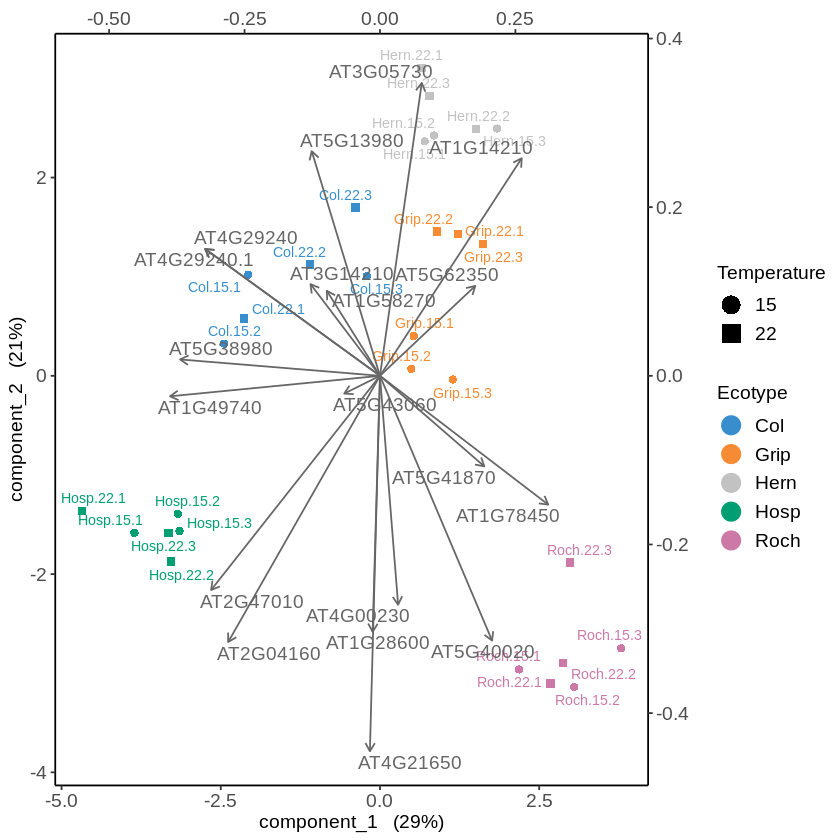

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Rosettes_CW,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

#.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>
.</br>




#UNIVARIATE STEM ECOTYPE

###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [ ]:
for(i in 1:ncol(Metabolomics_Stems)){Metabolomics_Stems[,i][is.na(Metabolomics_Stems[,i])]<-median(Metabolomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Stems)){Phenomics_Stems[,i][is.na(Phenomics_Stems[,i])]<-median(Phenomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Stems_CW)){Proteomics_Stems_CW[,i][is.na(Proteomics_Stems_CW[,i])]<-median(Proteomics_Stems_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems)){Transcriptomics_Stems[,i][is.na(Transcriptomics_Stems[,i])]<-median(Transcriptomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems_CW)){Transcriptomics_Stems_CW[,i][is.na(Transcriptomics_Stems_CW[,i])]<-median(Transcriptomics_Stems_CW[,i],na.rm=TRUE)}


###handling nonzero 
cause it cause problem in diablo WITH TRANSCRIPTOMICS

In [ ]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Stems)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Stems <- Transcriptomics_Stems[,-which(colnames(Transcriptomics_Stems)%in%rownames(my_nearZeroVar$Metrics))]


###feature selection

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

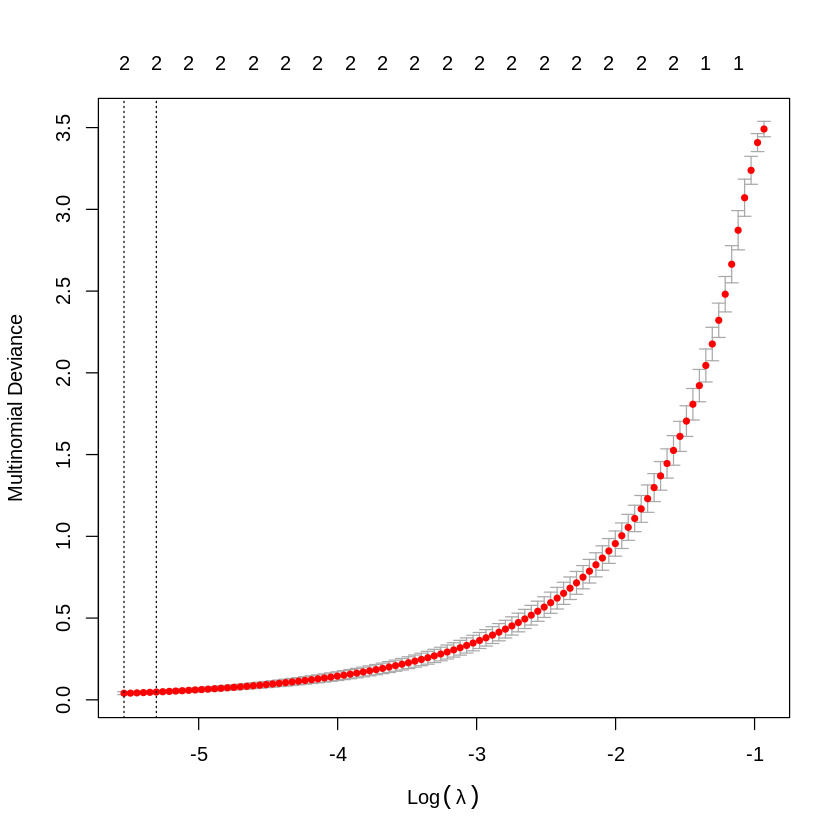

In [ ]:
#Proteomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Proteomics_Stems_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Proteomics_Stems_CW)[unlist(coef)]
Proteomics_Stems_CW<-subset(Proteomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

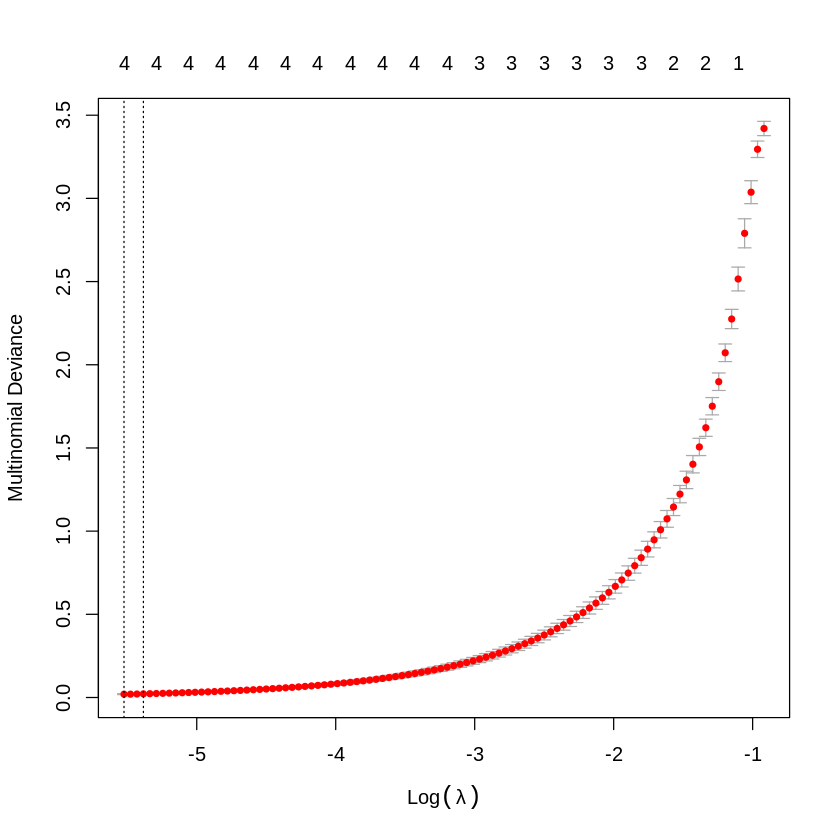

In [ ]:
#Transcriptomics_Stems
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems)[unlist(coef)]
Transcriptomics_Stems<-subset(Transcriptomics_Stems, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial but these colnames are enough to subset are data set with only informative vars

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

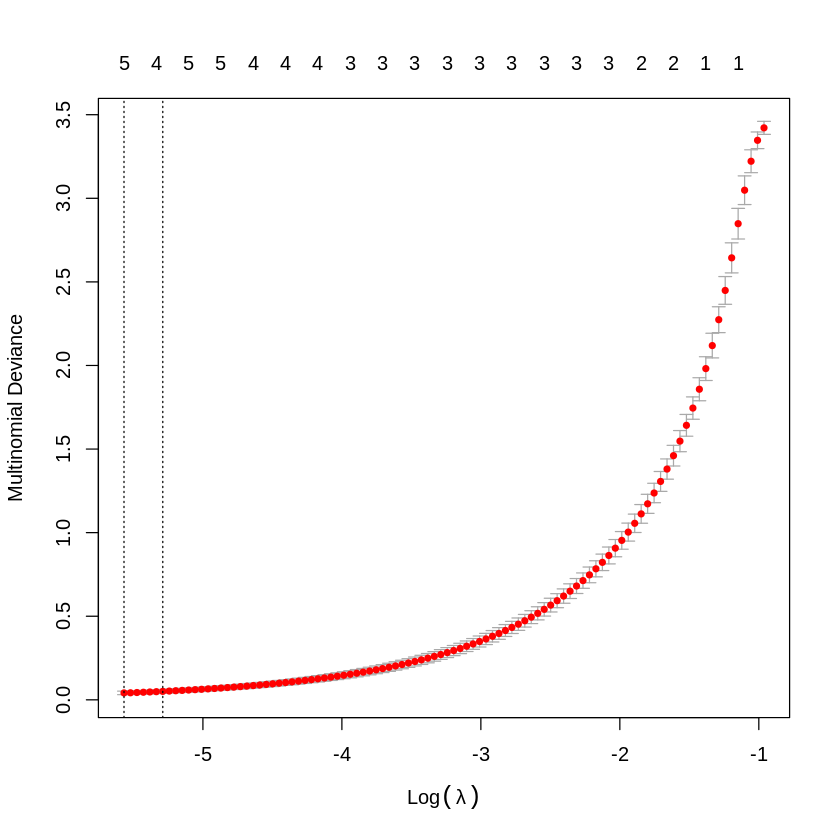

In [ ]:
#Transcriptomics_Stems_CW
lasso_fit <- cv.glmnet(as.matrix(Transcriptomics_Stems_CW), Ecotype, family="multinomial", alpha=1)
plot(lasso_fit)

In [ ]:

coef<-predict(lasso_fit, s = "lambda.min", type = "nonzero")
features<-colnames(Transcriptomics_Stems_CW)[unlist(coef)]
Transcriptomics_Stems_CW<-subset(Transcriptomics_Stems_CW, select = as.character(features))

#here we can't have df with var name and score cause it's multinomial and dufficult but these colnames are enough to subset are data set with only informative vars

In [ ]:
dim(Transcriptomics_Stems_CW)
dim(Transcriptomics_Stems)
dim(Proteomics_Stems_CW)

[1] 30 24

[1] 30 23

[1] 30 14

###PCA Analysis:

**Metabolomics_Stems:**

      PC1       PC2       PC3       PC4       PC5       PC6 
0.5732580 0.8533077 0.9864812 0.9956743 0.9991212 1.0000000 


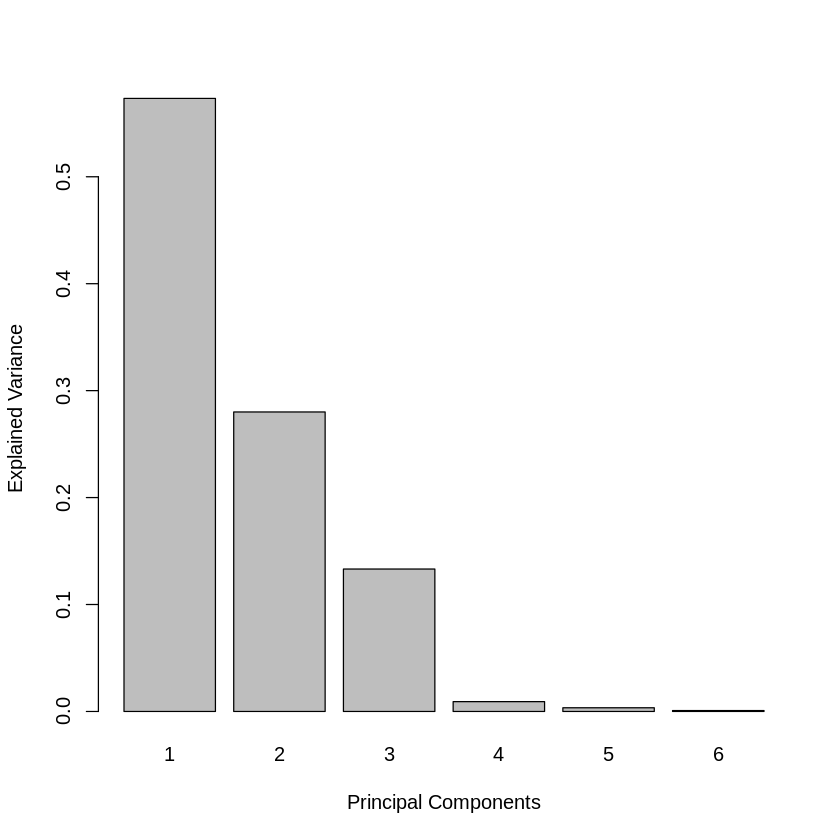

In [ ]:
x<-Metabolomics_Stems
tune_pca_metabo_stm <- tune.pca(x, ncomp = 6, scale = TRUE)
plot(tune_pca_metabo_stm)
print(tune_pca_metabo_stm$cum.var)       # Outputs cumulative proportion of variance

In [ ]:
# from above we see that cmp1 and cmp2 explains 0.85 of the total variance gence we only use those
final_pca_Metabo_stm <- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Metabo_stm$var.tot)
print(final_pca_Metabo_stm$prop_expl_var$X)

[1] 6
      PC1       PC2 
0.5732580 0.2800497 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Metabo_stm, comp = 1)$value)

,value.var
,<dbl>
XG,0.5136619
Pectin_HG,0.5076026
RGI_branching,-0.4699712
Pectin_linearity,0.3812306
Pectin_RGI,0.3297546
Contribution_RG,0.0595241


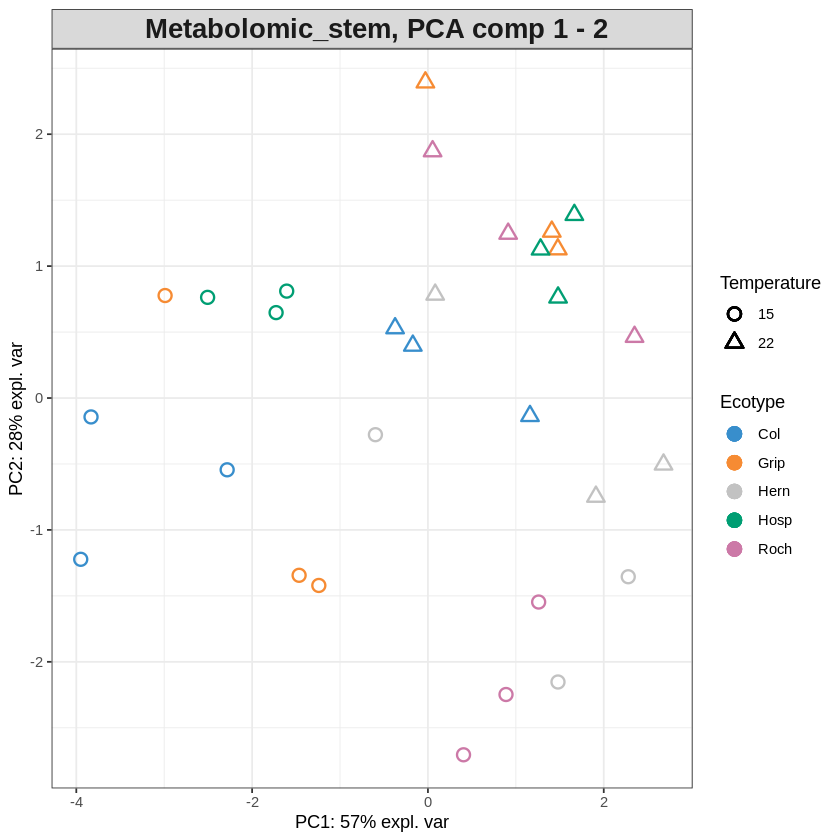

In [ ]:
#sample plots
plotIndiv(final_pca_Metabo_stm,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Metabolomic_stem, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature',)

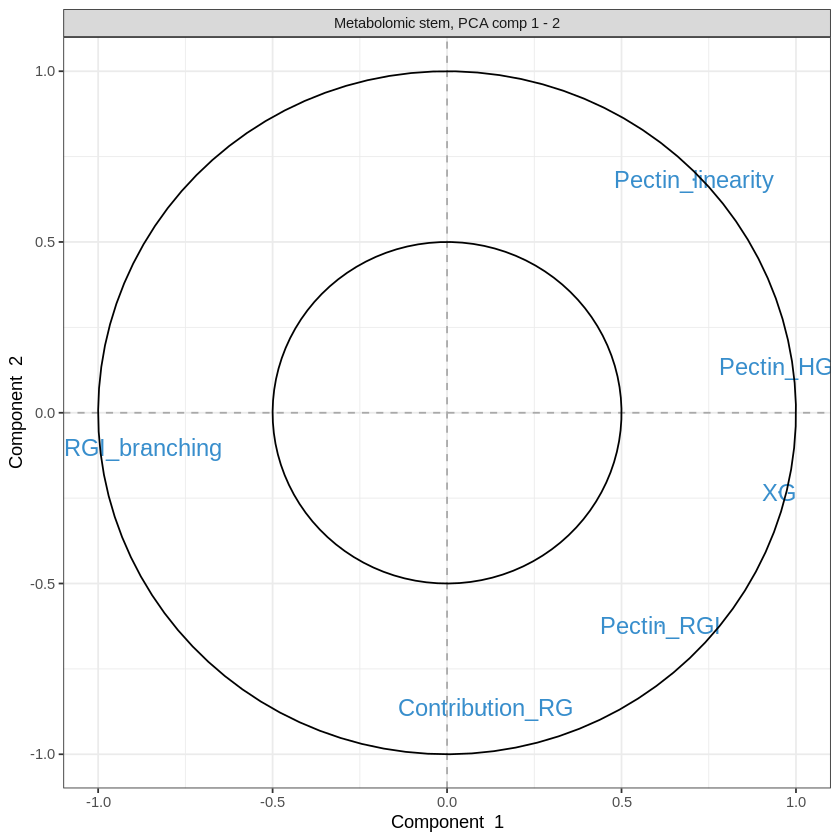

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Metabo_stm, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Metabolomic stem, PCA comp 1 - 2')

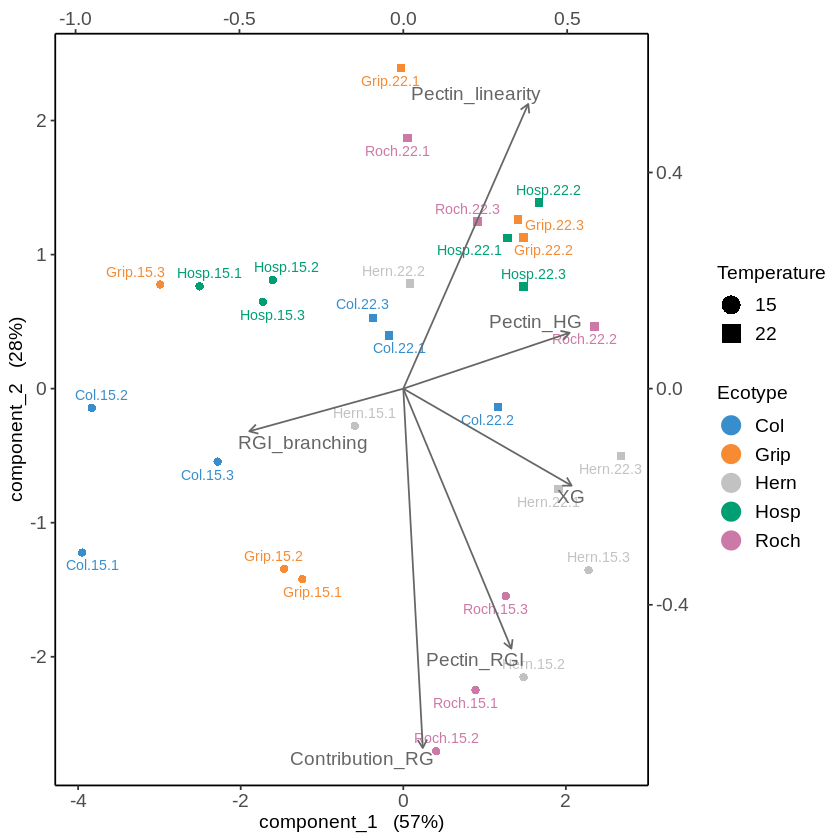

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Metabo_stm,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Phenomics_Stems:**

      PC1       PC2       PC3       PC4 
0.5388177 0.7914988 0.9674033 1.0000000 


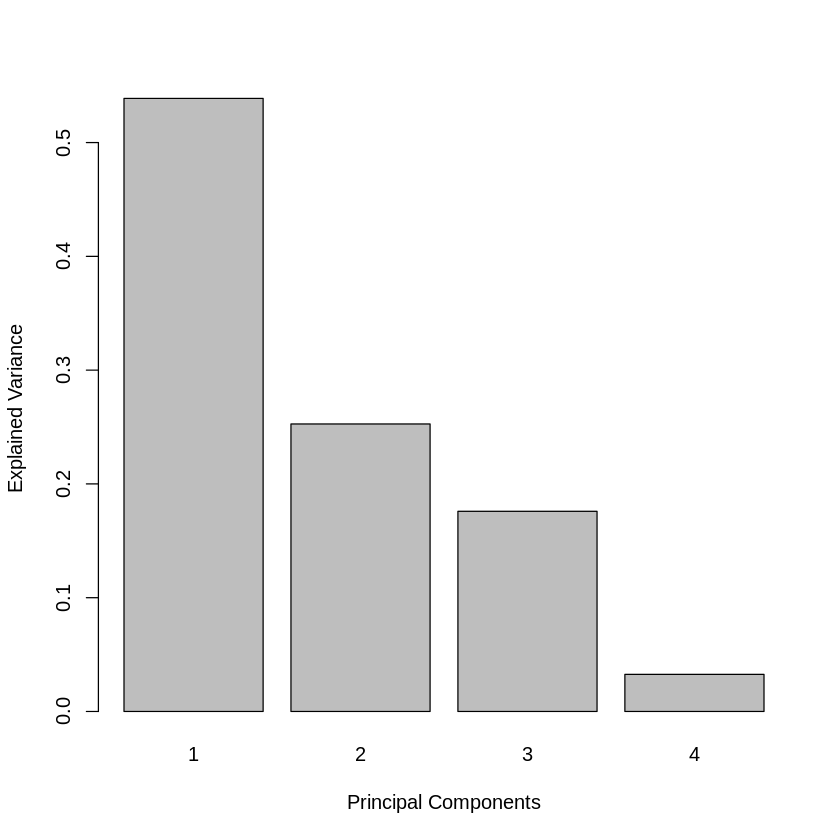

In [ ]:
x<-Phenomics_Stems
tune_pca_Phenomics_Stems <- tune.pca(x, ncomp = 4, scale = TRUE)
plot(tune_pca_Phenomics_Stems)
print(tune_pca_Phenomics_Stems$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 explains 0.96 of the total variance gence we only use those
final_pca_Phenomics_Stems <- pca(x, ncomp = 3, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Phenomics_Stems$var.tot)
print(final_pca_Phenomics_Stems$prop_expl_var$X)

[1] 4
      PC1       PC2       PC3 
0.5388177 0.2526811 0.1759045 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Phenomics_Stems, comp = 1)$value)

,value.var
,<dbl>
Mass,-0.6493278
Length,-0.5988495
Number_lateral_stems,0.4233349
Diameter,-0.2013462


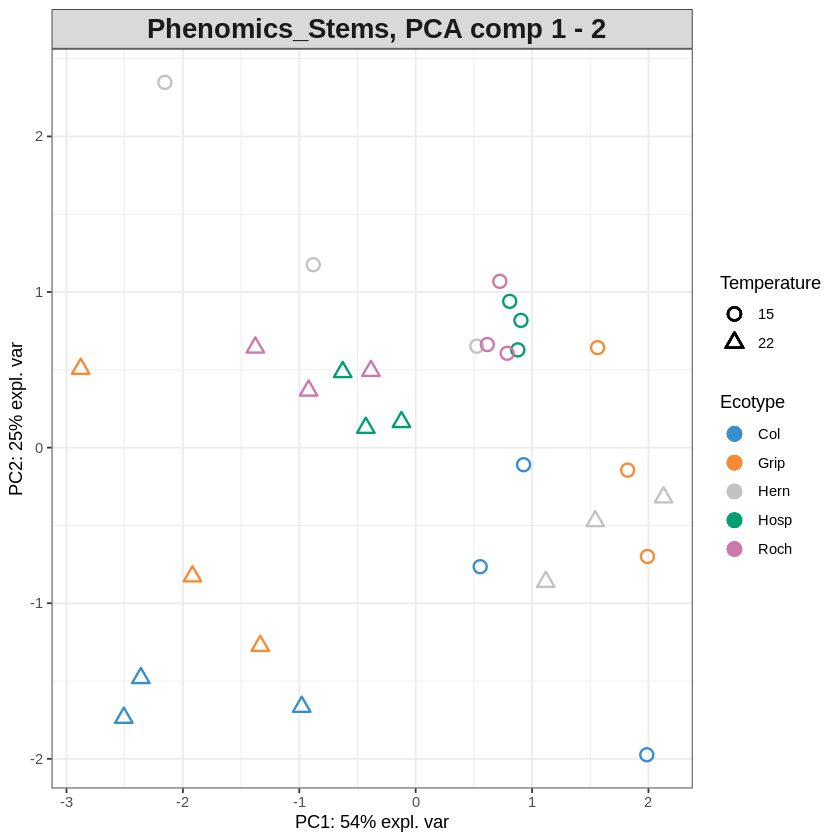

In [ ]:
#sample plots
plotIndiv(final_pca_Phenomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Phenomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

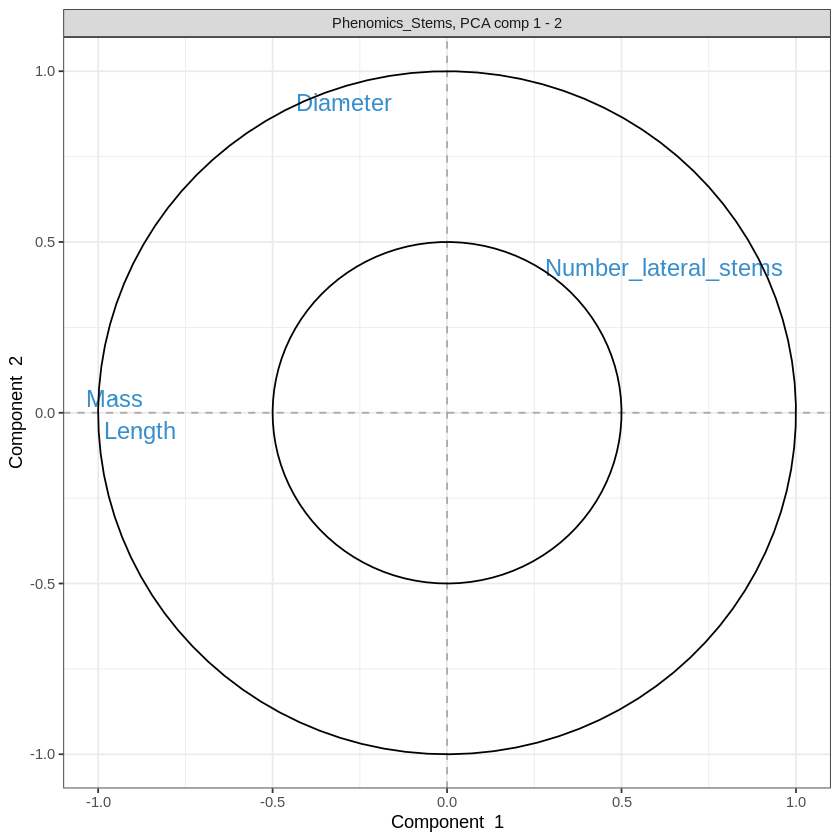

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Phenomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 5,         # To change the font size
        # cutoff = 0.5,  # For further cutoff
        title = 'Phenomics_Stems, PCA comp 1 - 2')

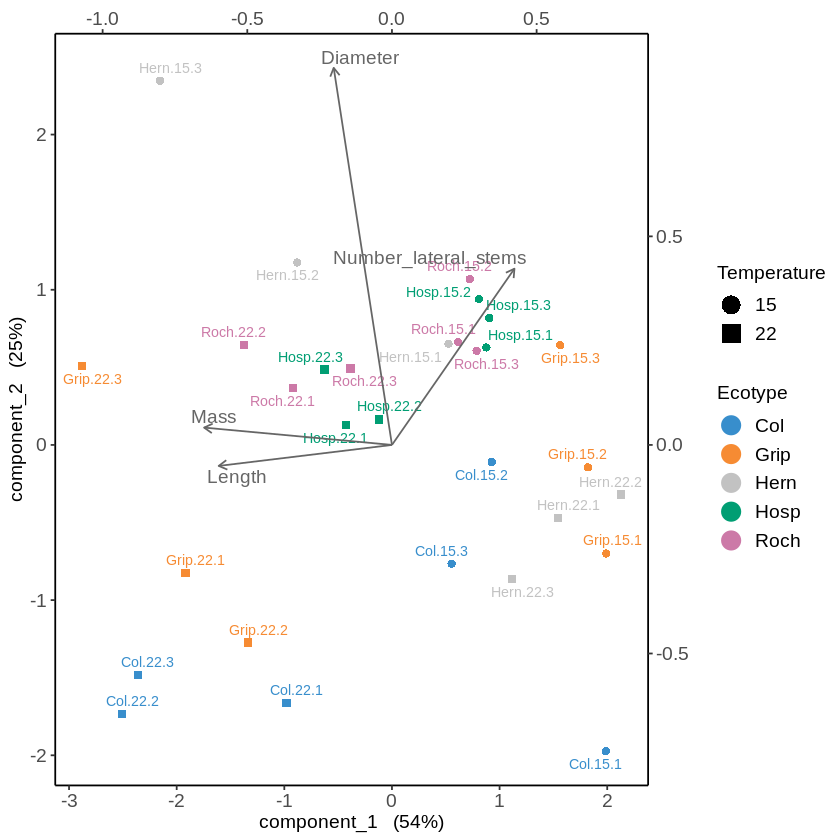

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Phenomics_Stems,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Proteomics_Stems_CW**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2807824 0.5222456 0.6809796 0.8038671 0.8519046 0.8889693 0.9203996 0.9487538 
      PC9      PC10 
0.9694789 0.9813318 


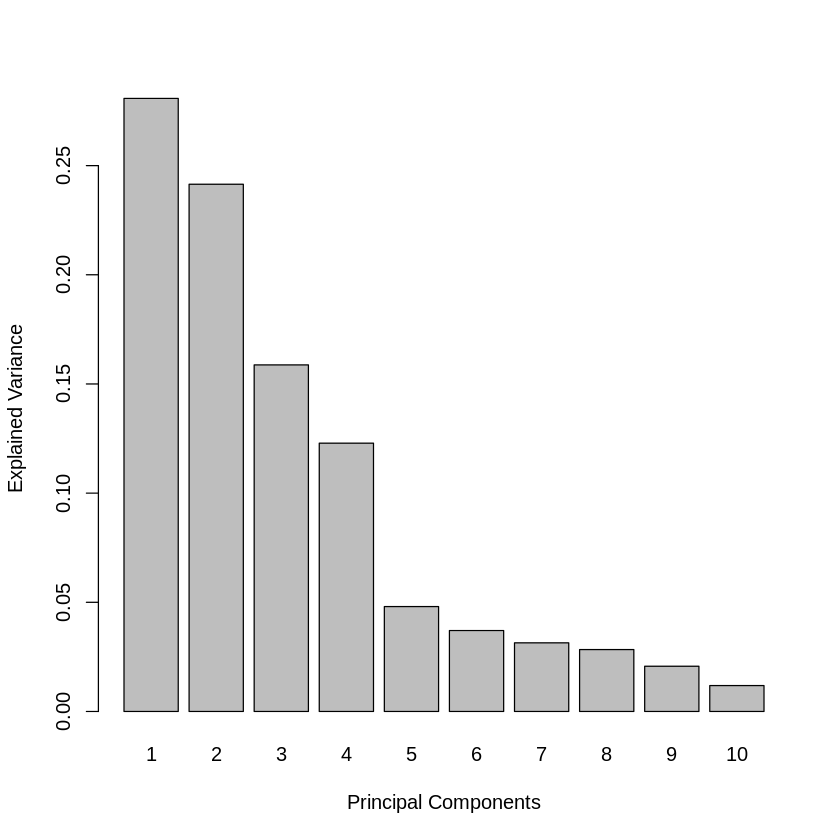

In [ ]:
x<-Proteomics_Stems_CW
tune_pca_Proteomics_Stems_CW<- tune.pca(x, ncomp = 10, scale = TRUE)
plot(tune_pca_Proteomics_Stems_CW)
print(tune_pca_Proteomics_Stems_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Proteomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Proteomics_Stems_CW$var.tot)
print(final_pca_Proteomics_Stems_CW$prop_expl_var$X)

[1] 14
      PC1       PC2 
0.2807824 0.2414631 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Proteomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT5G06860,0.4128911
AT1G78820,-0.4095121
AT1G53070,-0.3294667
AT1G71040,-0.3287939
AT1G28290,-0.3101961
AT1G57590,-0.2898238


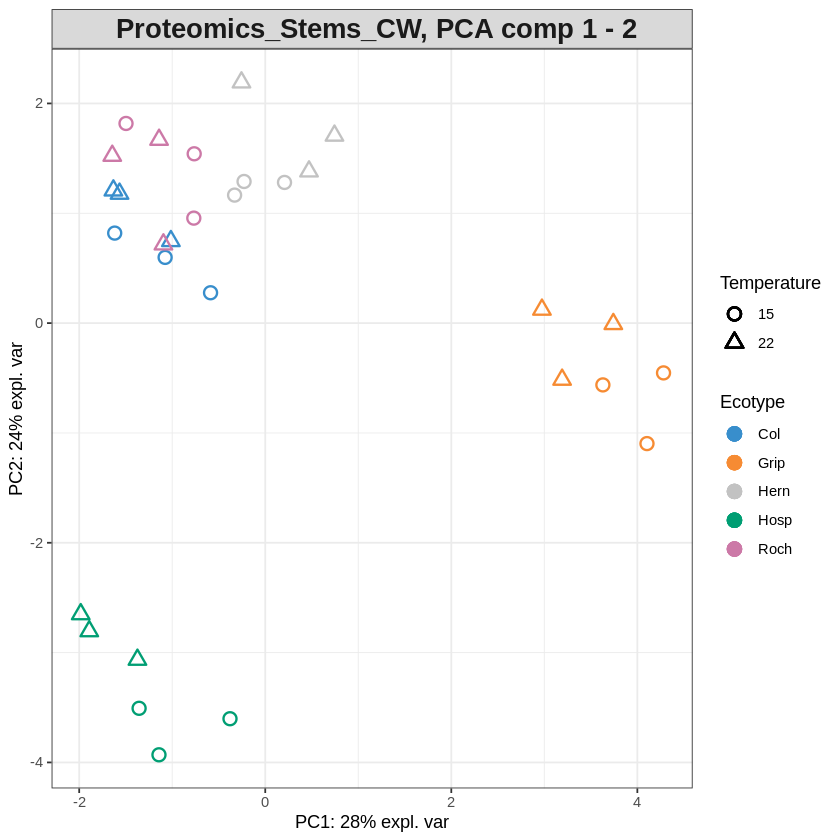

In [ ]:
#sample plots
plotIndiv(final_pca_Proteomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Proteomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

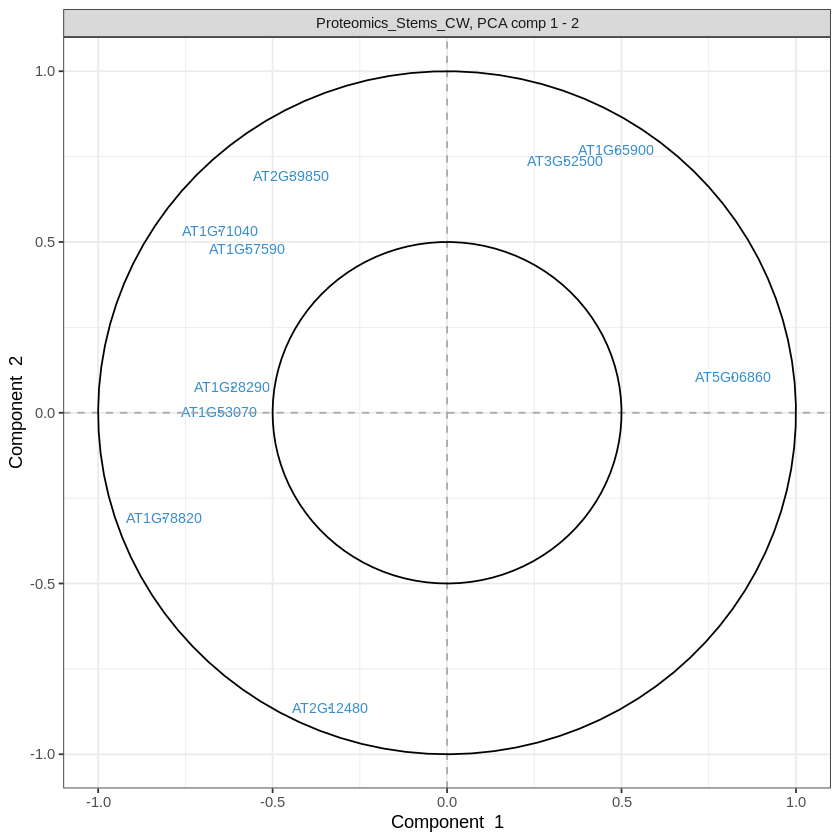

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Proteomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       cutoff = 0.5,  # For further cutoff
        title = 'Proteomics_Stems_CW, PCA comp 1 - 2')

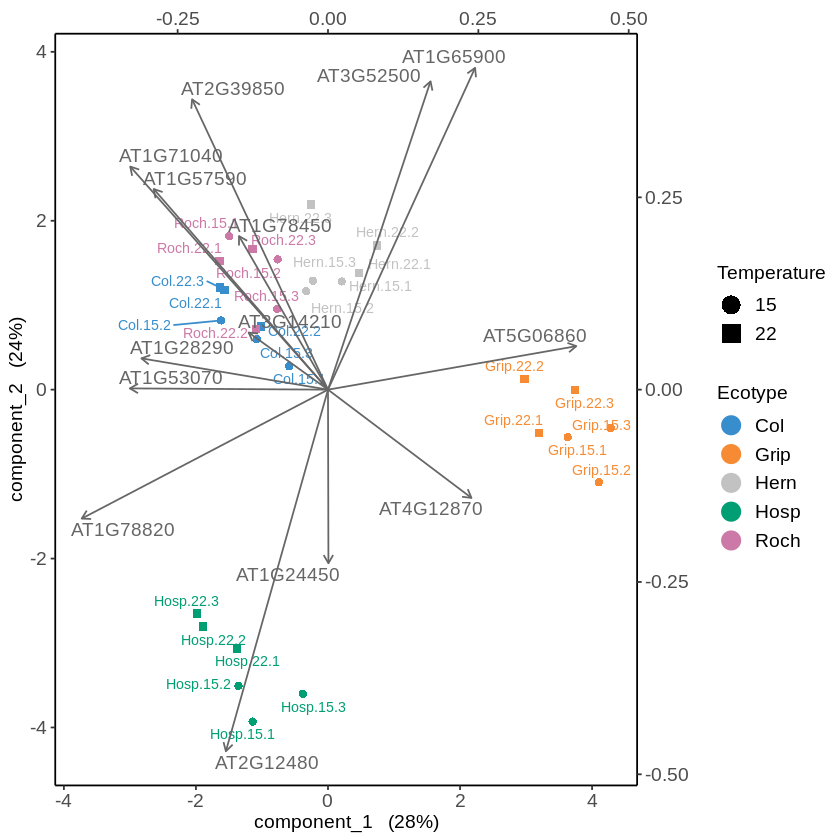

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Proteomics_Stems_CW,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Transcriptomics_Stems**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.3451097 0.5969810 0.8065381 0.9813911 0.9854788 0.9879167 0.9901536 0.9918855 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9933806 0.9947536 0.9957179 0.9966195 0.9974234 0.9980472 0.9985961 0.9990247 
     PC17      PC18      PC19      PC20 
0.9994023 0.9996127 0.9997851 0.9998815 


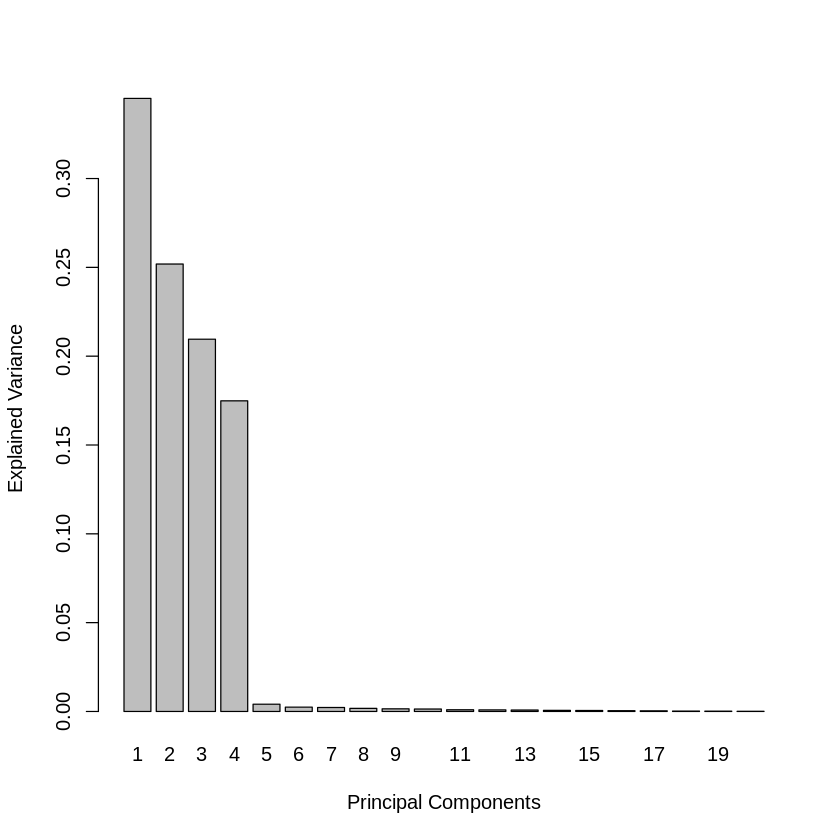

In [ ]:
x<-Transcriptomics_Stems
tune_pca_Transcriptomics_Stems<- tune.pca(x, ncomp = 20, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems)
print(tune_pca_Transcriptomics_Stems$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems$var.tot)
print(final_pca_Transcriptomics_Stems$prop_expl_var$X)

[1] 23
      PC1       PC2 
0.3451097 0.2518713 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems, comp = 1)$value)

,value.var
,<dbl>
AT5G59690,-0.3513015
AT1G52347,-0.3506251
AT4G14905,-0.3505987
AT5G17880,-0.3499477
AT5G17890,-0.3495613
AT2G10410,-0.3491369


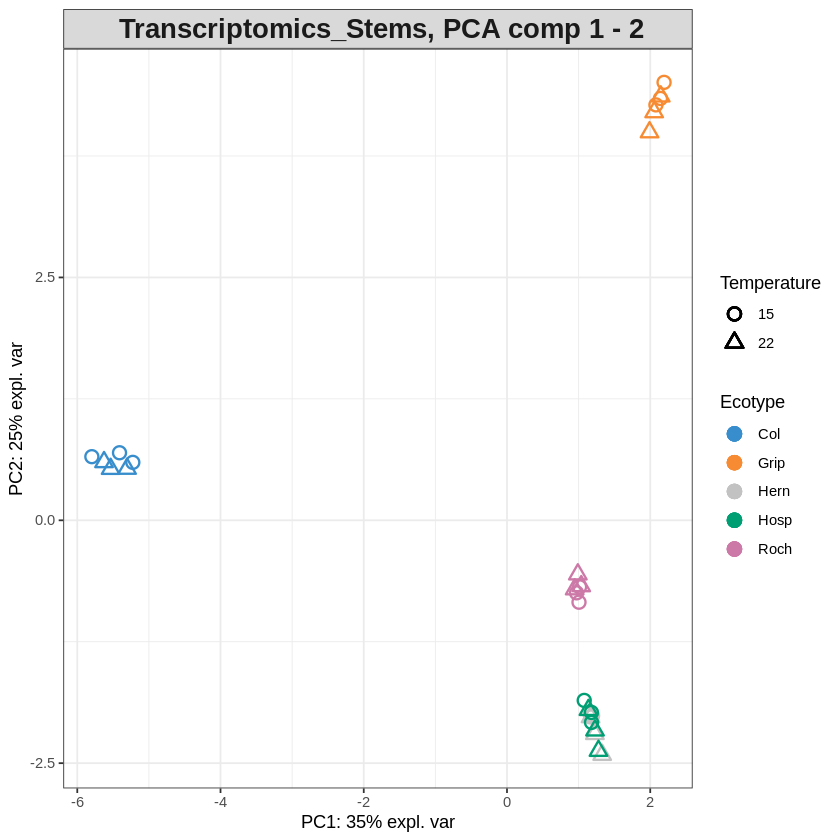

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Transcriptomics_Stems, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

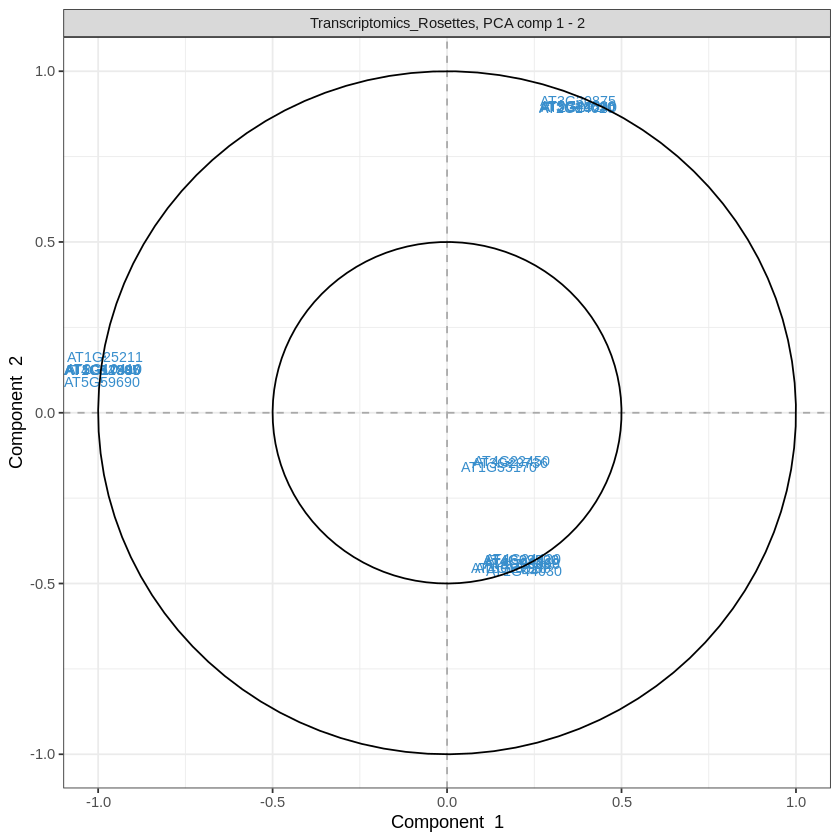

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Rosettes, PCA comp 1 - 2')

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


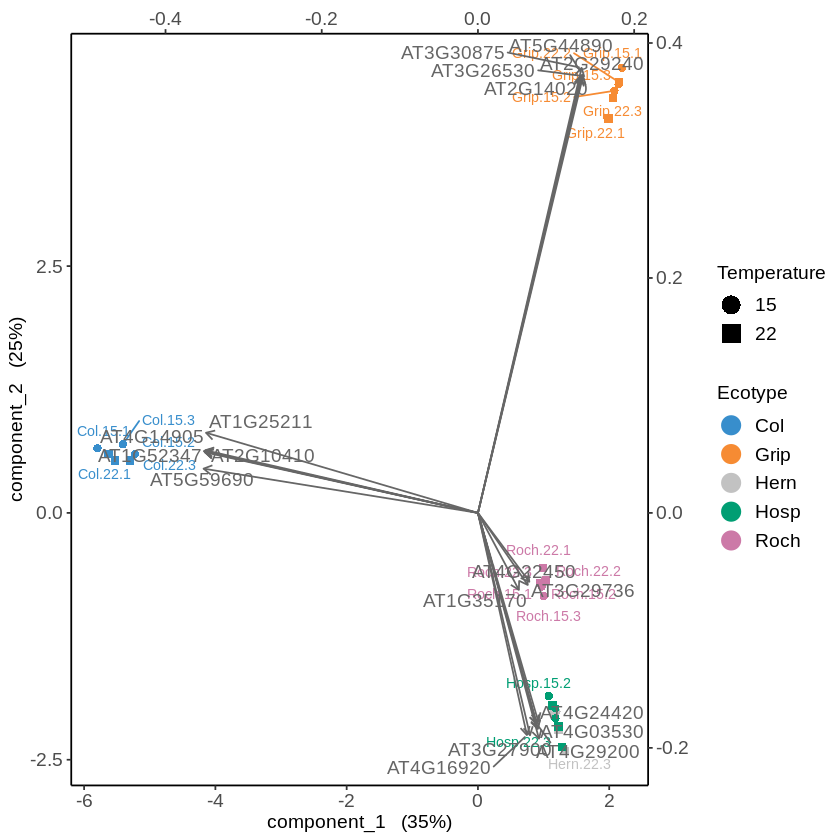

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")

**Transcriptomics_Stems_CW:**

      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2852320 0.4856220 0.6606023 0.8167504 0.8666479 0.9058394 0.9276241 0.9440982 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
0.9575443 0.9667522 0.9747611 0.9804315 0.9855173 0.9890048 0.9924648 0.9948869 
     PC17      PC18      PC19      PC20 
0.9963183 0.9976326 0.9983680 0.9990061 


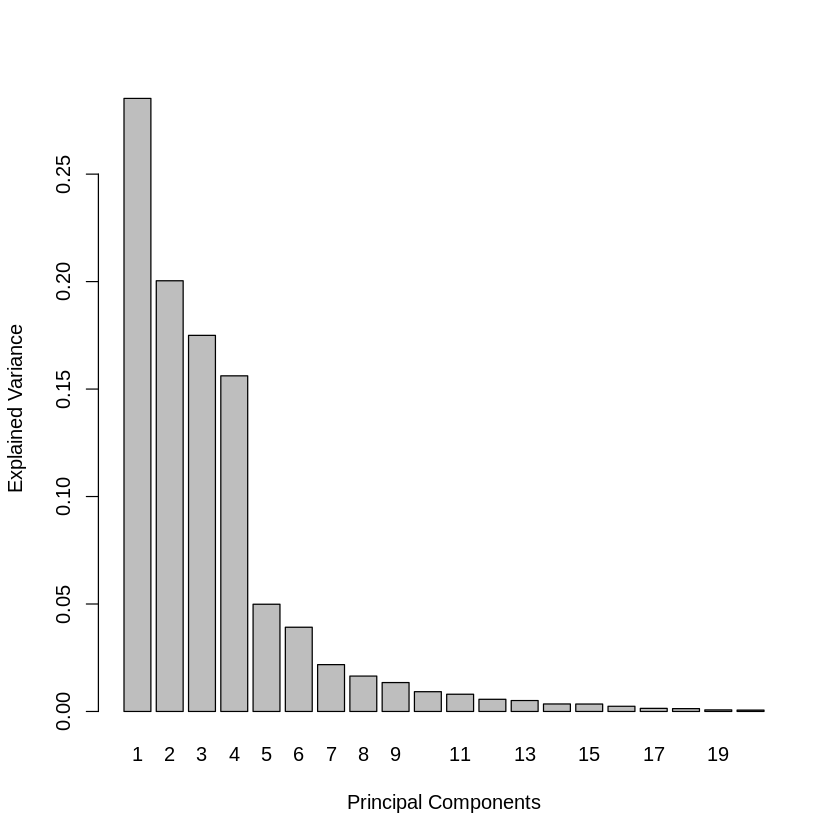

In [ ]:
x<-Transcriptomics_Stems_CW
tune_pca_Transcriptomics_Stems_CW<- tune.pca(x, ncomp = 20, scale = TRUE)
plot(tune_pca_Transcriptomics_Stems_CW)
print(tune_pca_Transcriptomics_Stems_CW$cum.var)

In [ ]:
# from above we see that cmp1 and cmp2 cmp3 are teh biggest variation of the total variance gence we only use those
final_pca_Transcriptomics_Stems_CW<- pca(x, ncomp = 2, center = TRUE, scale = TRUE)
#final_pca_Metabo_stm  # Lists possible outputs
print(final_pca_Transcriptomics_Stems_CW$var.tot)
print(final_pca_Transcriptomics_Stems_CW$prop_expl_var$X)

[1] 24
     PC1      PC2 
0.285232 0.200390 


In [ ]:
#idnetifying the informative variables
# Top variables on the first component only:
head(selectVar(final_pca_Transcriptomics_Stems_CW, comp = 1)$value)

,value.var
,<dbl>
AT1G78820,0.3382714
AT1G61900,-0.3305458
AT1G14210,-0.3288194
AT4G02330,0.3180540
AT5G09760,0.2796627
AT5G47550,-0.2760711


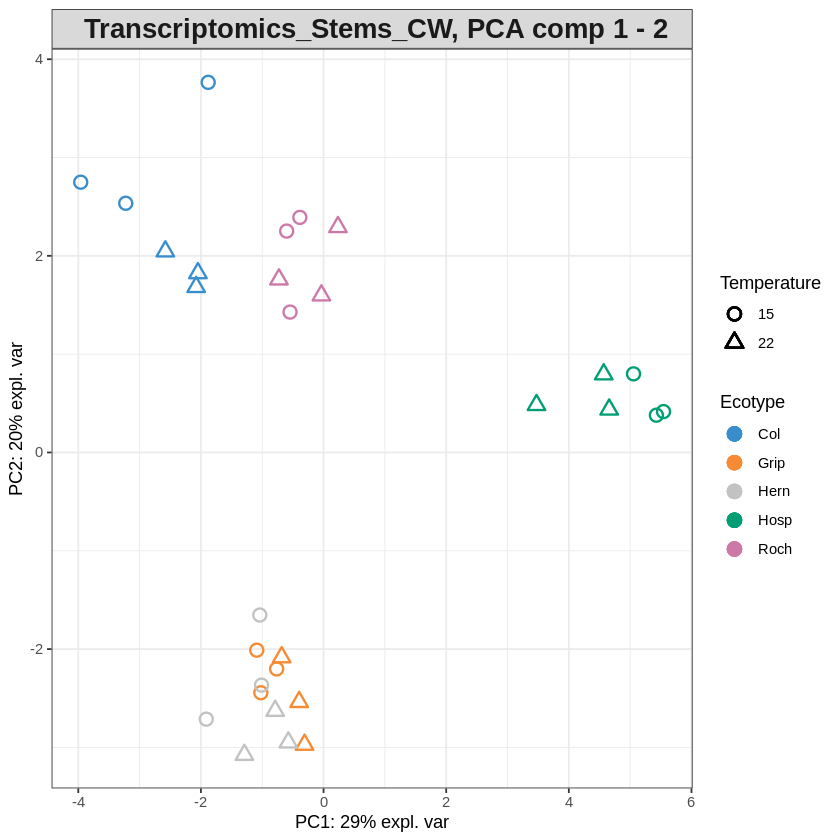

In [ ]:
#sample plots
plotIndiv(final_pca_Transcriptomics_Stems_CW,
          comp = c(1, 2),   # Specify components to plot
          ind.names = TRUE, # Show row names of samples
          group=Ecotype,
          pch=Temperature,
          title = ' Transcriptomics_Stems_CW, PCA comp 1 - 2',
          legend = TRUE, 
          legend.title = 'Ecotype',
          legend.title.pch = 'Temperature')

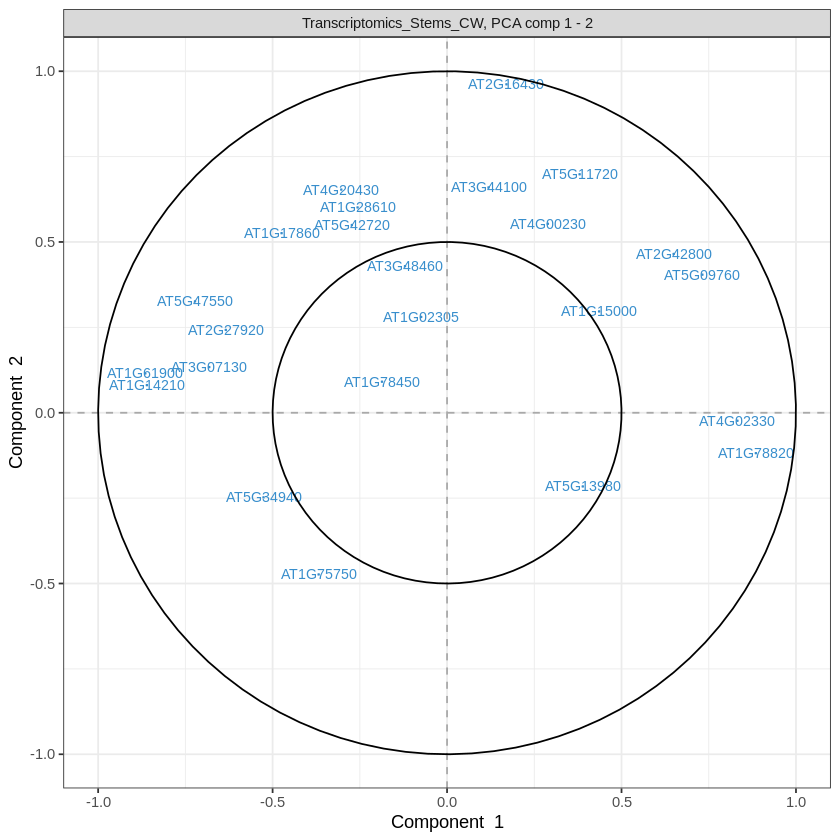

In [ ]:
#variable plot /correlation plot
plotVar(final_pca_Transcriptomics_Stems_CW, comp = c(1, 2),
        var.names = TRUE,
        cex = 3,         # To change the font size
       #cutoff = 0.3,  # For further cutoff
        title = 'Transcriptomics_Stems_CW, PCA comp 1 - 2')

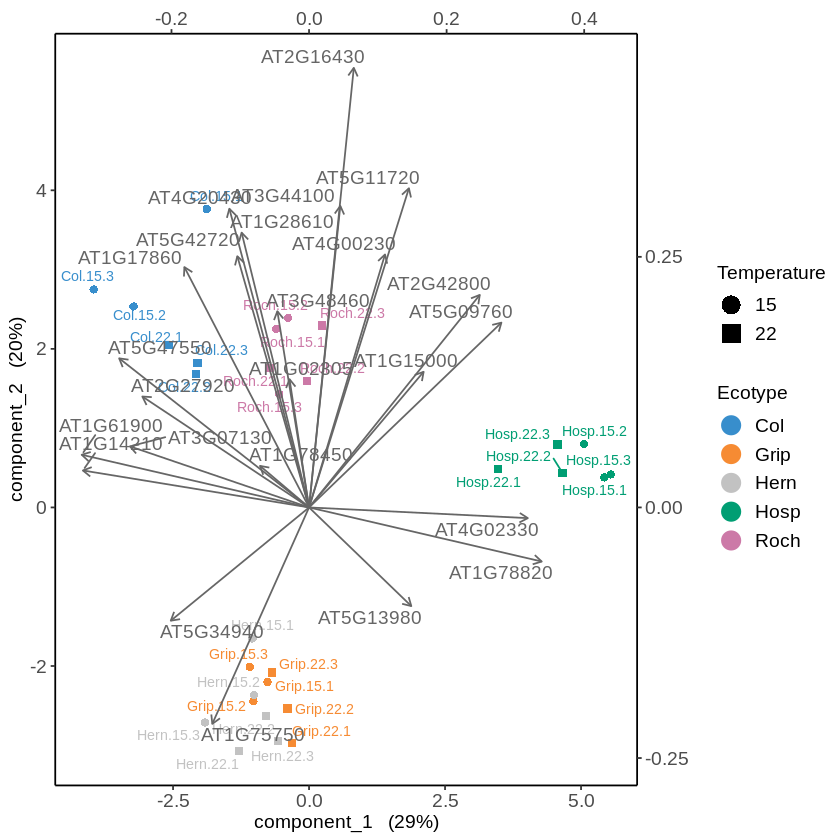

In [ ]:
#Biplot samples and variables 
biplot(final_pca_Transcriptomics_Stems_CW,
        group = Ecotype ,
        pch = Temperature, 
       legend.title = 'Ecotype',
       legend.title.pch="Temperatue")